**Importing Packages**

In [53]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv('AMCAT_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [55]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

**Data Cleaning**

In [56]:
# Assuming your DataFrame is named df
df.drop(columns=['Unnamed: 0'], inplace=True)

In [57]:
continuous_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA',
                      'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
                      'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
                      'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
                      'conscientiousness', 'agreeableness', 'extraversion',
                      'nueroticism', 'openess_to_experience']

for column in continuous_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [58]:
percentage_columns = ['10percentage', '12percentage']
for column in percentage_columns:
    invalid_percentage_values = df[(df[column] < 0) | (df[column] > 100)]
    if not invalid_percentage_values.empty:
        print(f"Found invalid percentage values in column '{column}':")
        print(invalid_percentage_values)

In [59]:
df['DOL'] = df['DOL'].replace('present', pd.to_datetime('2015-12-31'))
to_date = ['DOJ','DOL', 'DOB', '12graduation', 'GraduationYear']
for col in to_date:
  df[col]= pd.to_datetime(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   datetime64[ns]
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [60]:
standardized_test_columns = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
                             'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
                             'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

for column in standardized_test_columns:
    df[column] = df[column].replace(-1, np.nan)


In [61]:
unrealistic_percentage_values = df[(df['10percentage'] < 0) | (df['10percentage'] > 100) |
                                   (df['12percentage'] < 0) | (df['12percentage'] > 100)]
if not unrealistic_percentage_values.empty:
    print("Found unrealistic percentage values:")
    print(unrealistic_percentage_values)

else:
  print('No unrealistic percentage')


No unrealistic percentage


In [62]:
unrealistic_gpa_values = df[(df['collegeGPA'] < 0) | (df['collegeGPA'] > 10)]
if not unrealistic_gpa_values.empty:
    print("Found unrealistic GPA values:")
    unrealistic_gpa_values_subset = unrealistic_gpa_values[['ID', 'collegeGPA']]
    print(unrealistic_gpa_values_subset)

Found unrealistic GPA values:
          ID  collegeGPA
0     203097       78.00
1     579905       70.06
2     810601       70.00
3     267447       74.64
4     343523       73.90
...      ...         ...
3993   47916       61.50
3994  752781       77.30
3995  355888       70.00
3996  947111       70.42
3997  324966       68.00

[3986 rows x 2 columns]


In [63]:
unrealistic_salary_values = df[(df['Salary'] < 0)]
if not unrealistic_salary_values.empty:
    print("Found unrealistic salary values:")
    print(unrealistic_salary_values)
else:
     print('No unrealistic salary values')

No unrealistic salary values


**Univariate Analysis:**

**Numerical**

Summary Statistics for 'Salary':
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


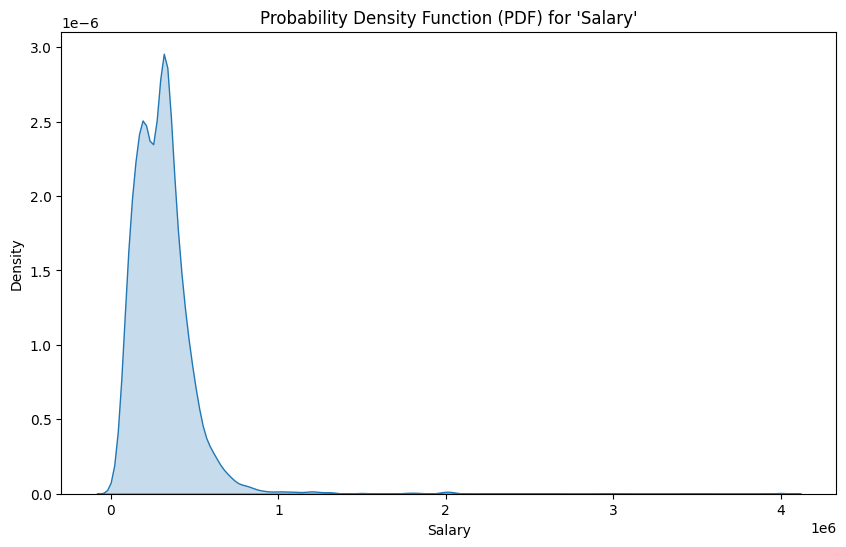

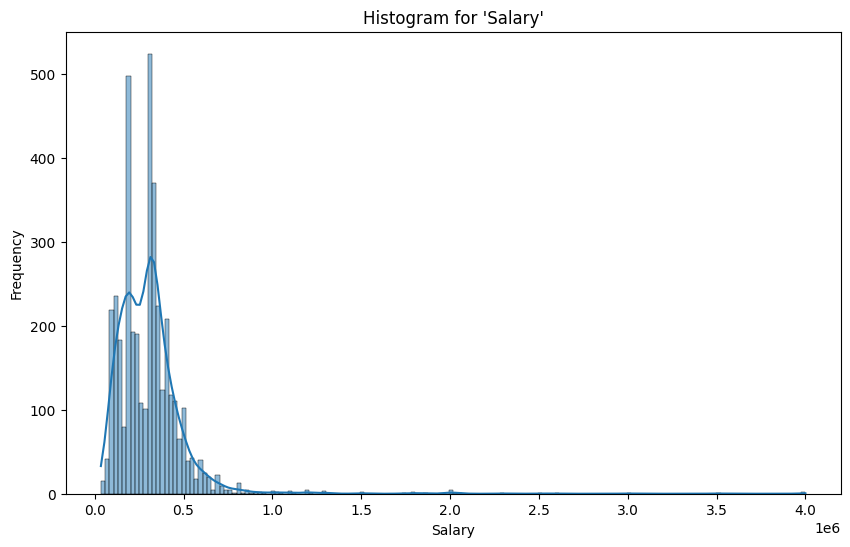

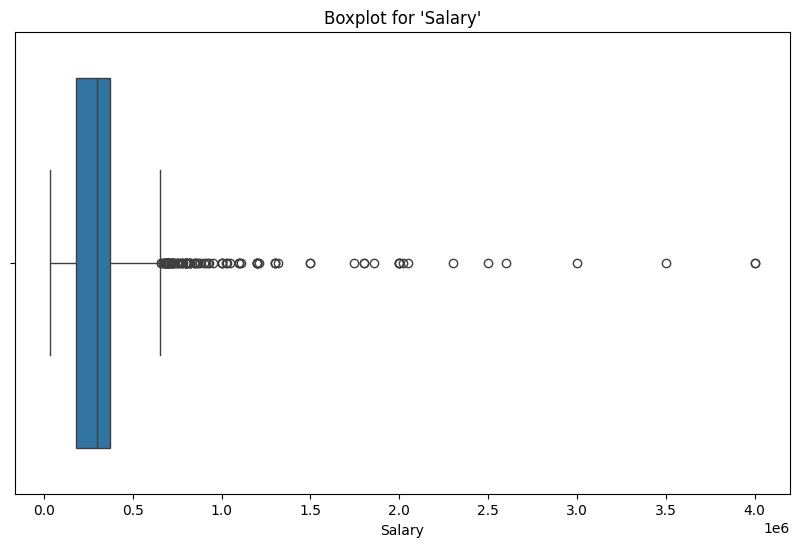

Summary Statistics for '10percentage':
count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


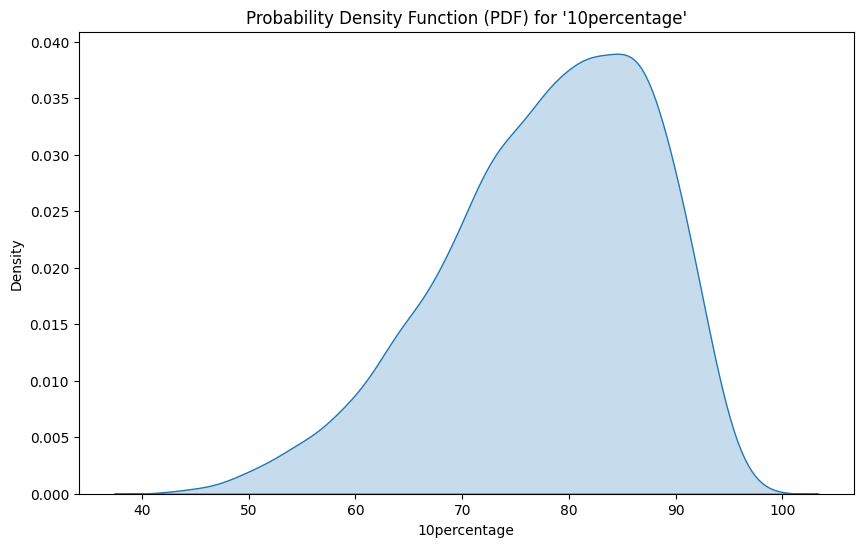

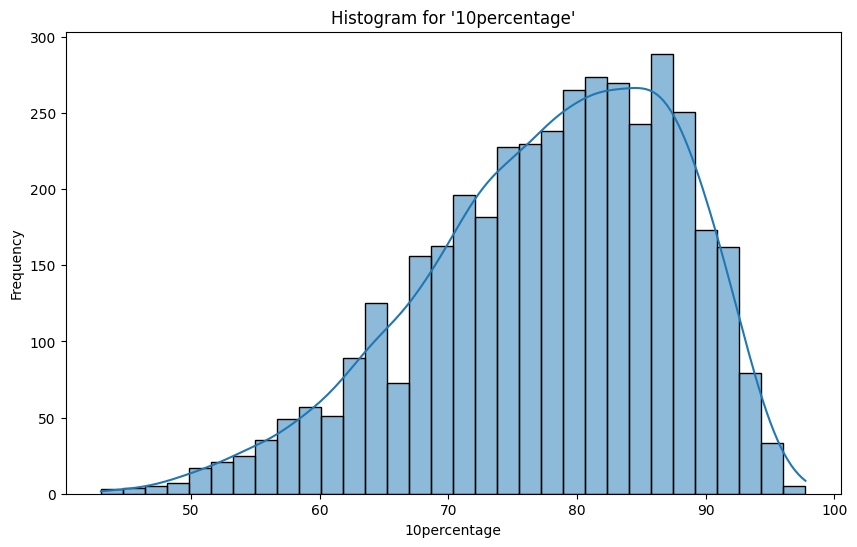

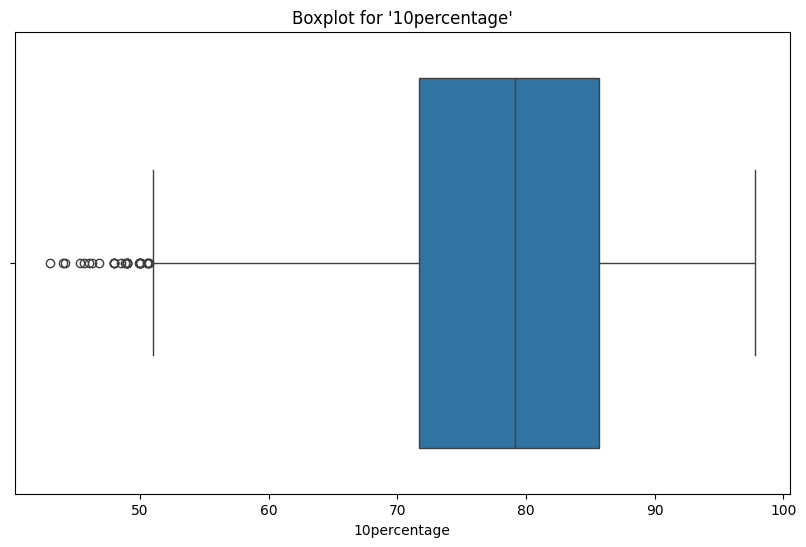

Summary Statistics for '12percentage':
count    3998.000000
mean       74.466366
std        10.999933
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


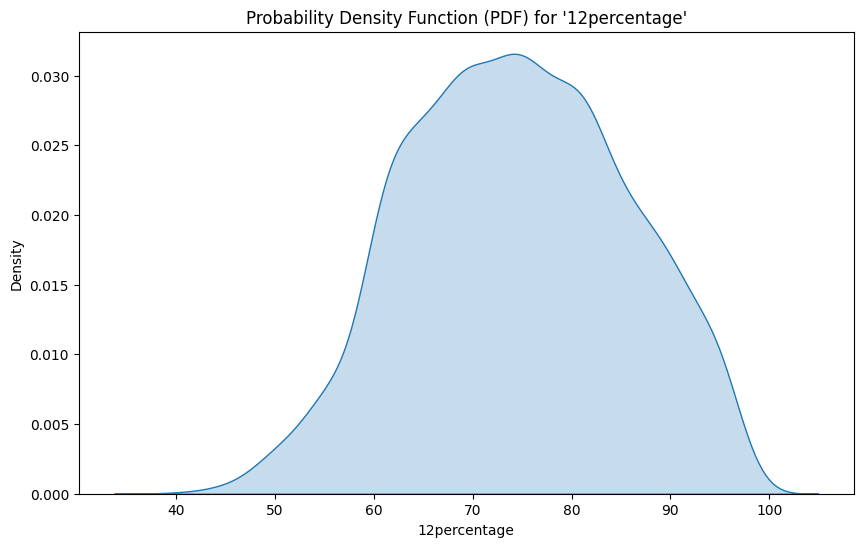

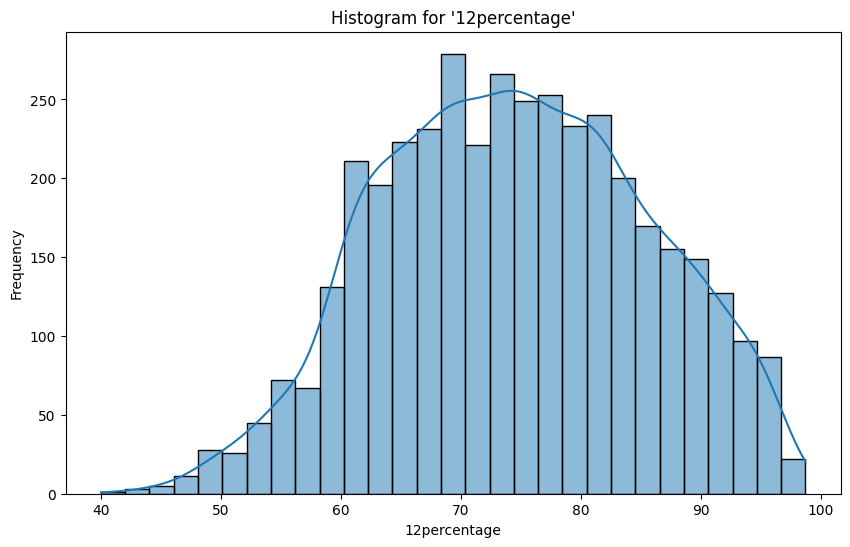

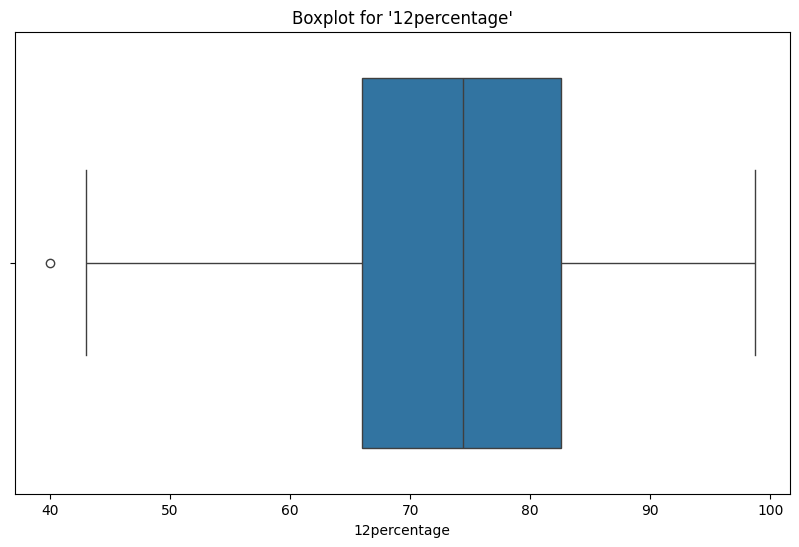

Summary Statistics for 'collegeGPA':
count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


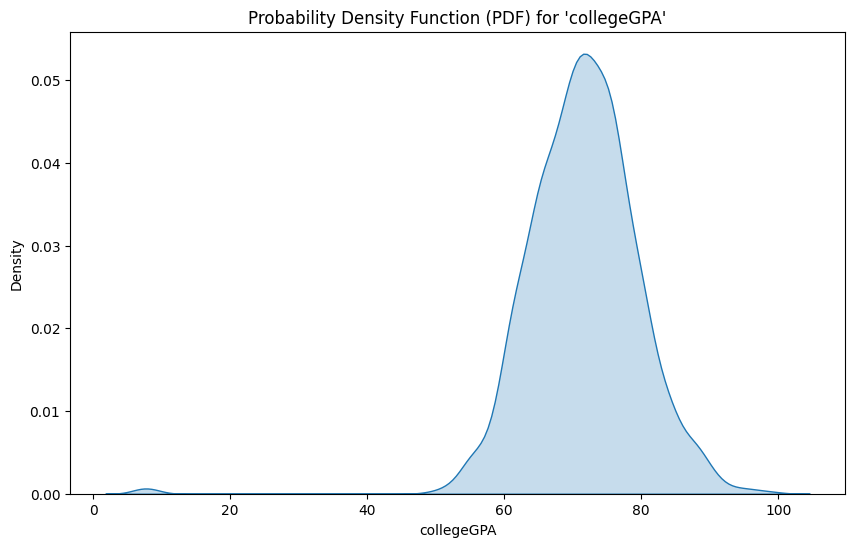

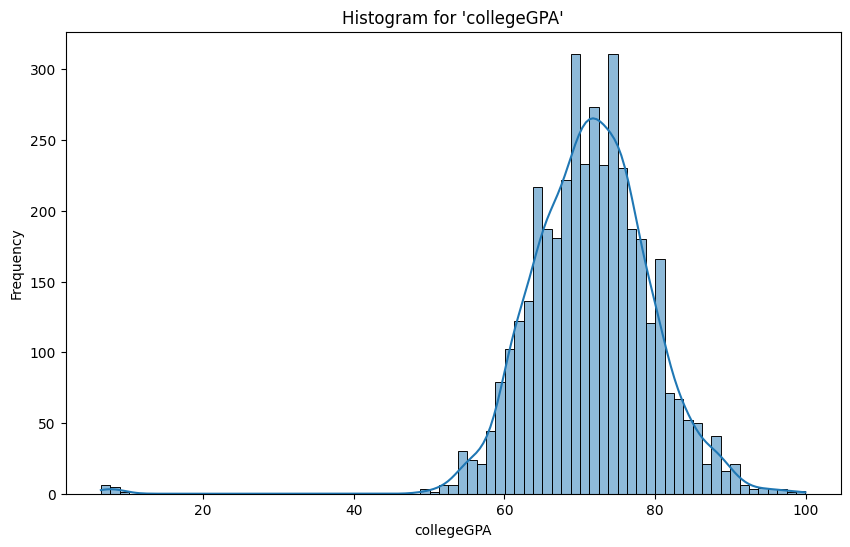

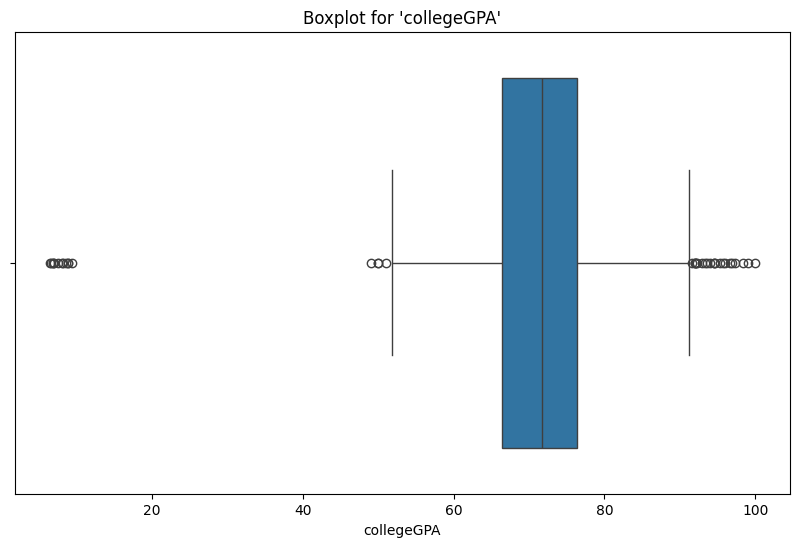

Summary Statistics for 'English':
count    3998.000000
mean      501.649075
std       104.940021
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


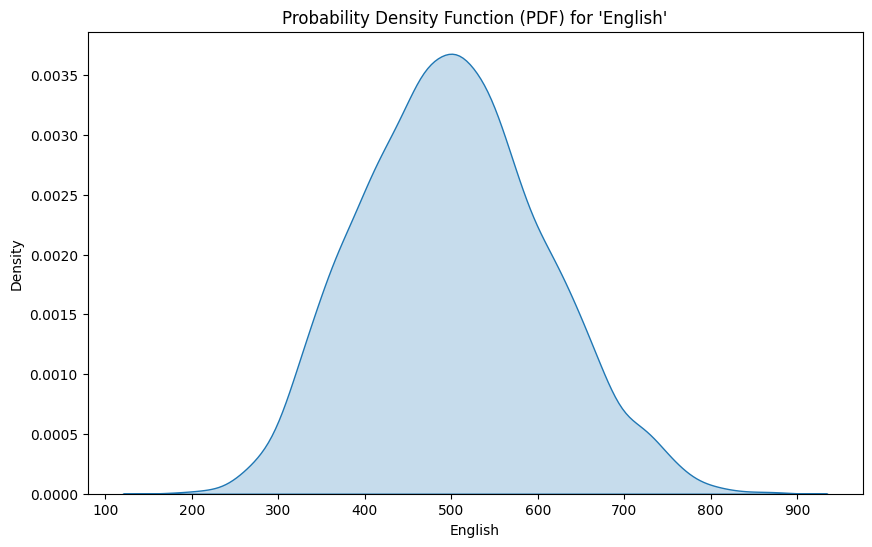

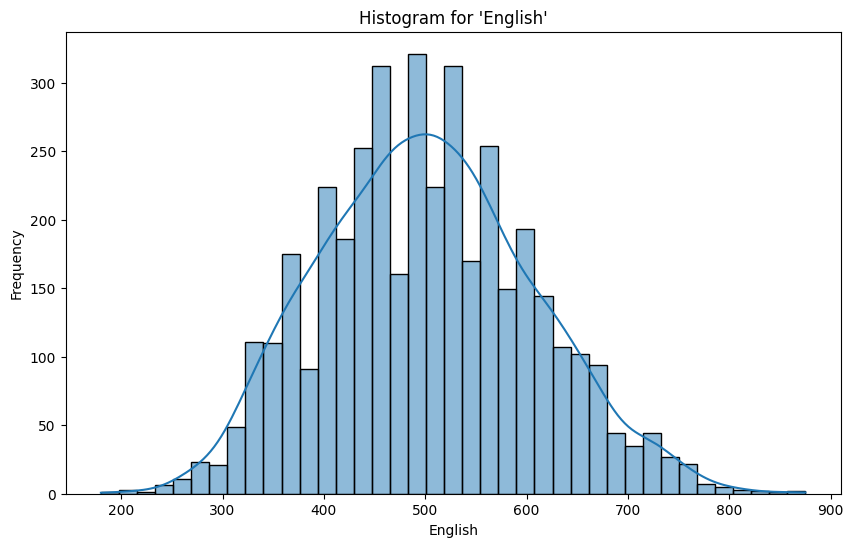

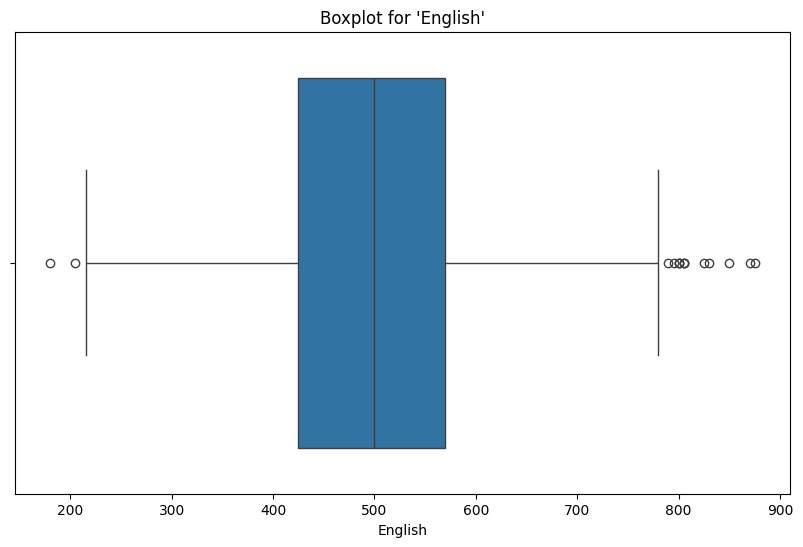

Summary Statistics for 'Logical':
count    3998.000000
mean      501.598799
std        86.783297
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


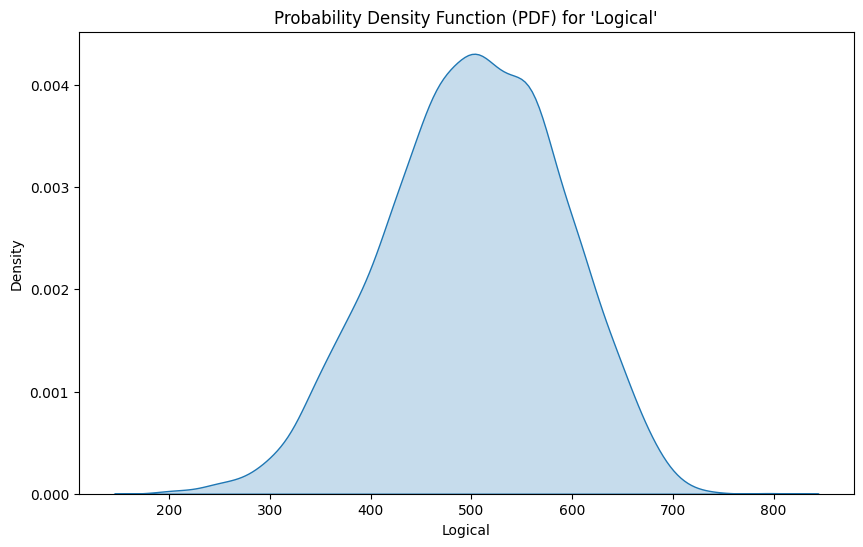

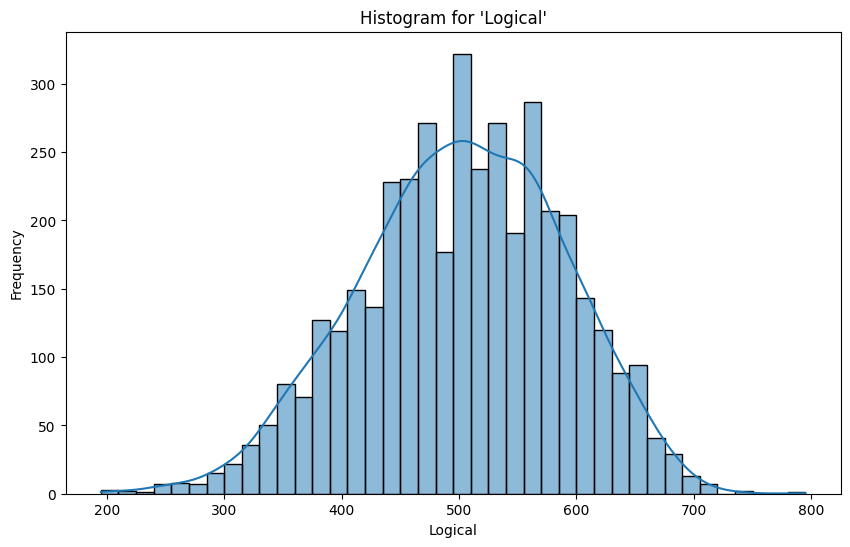

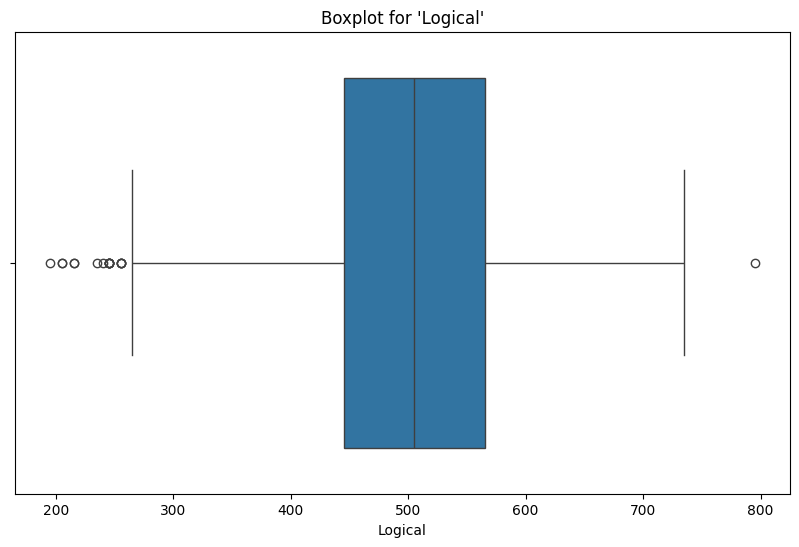

Summary Statistics for 'Quant':
count    3998.000000
mean      513.378189
std       122.302332
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


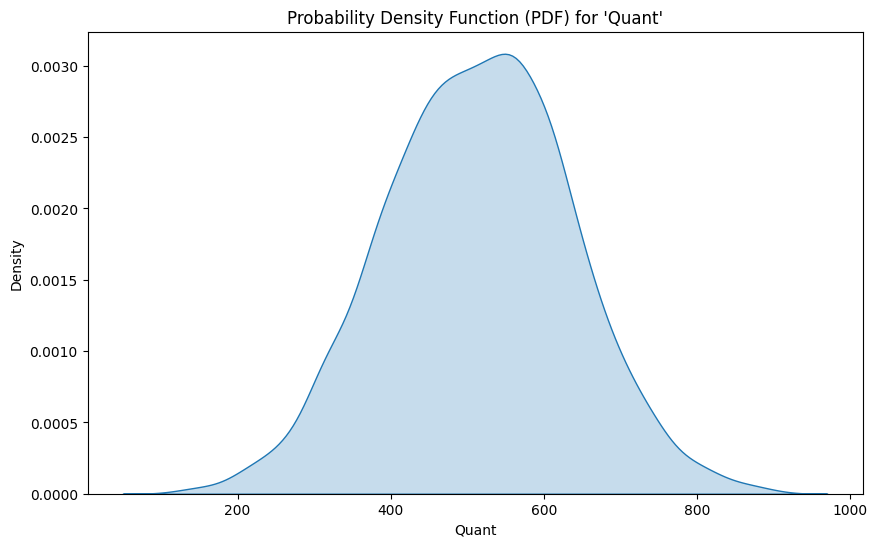

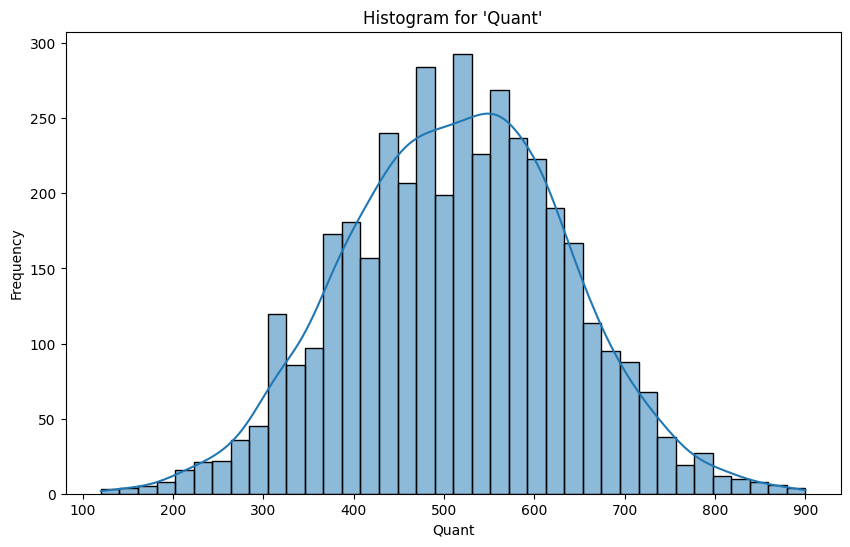

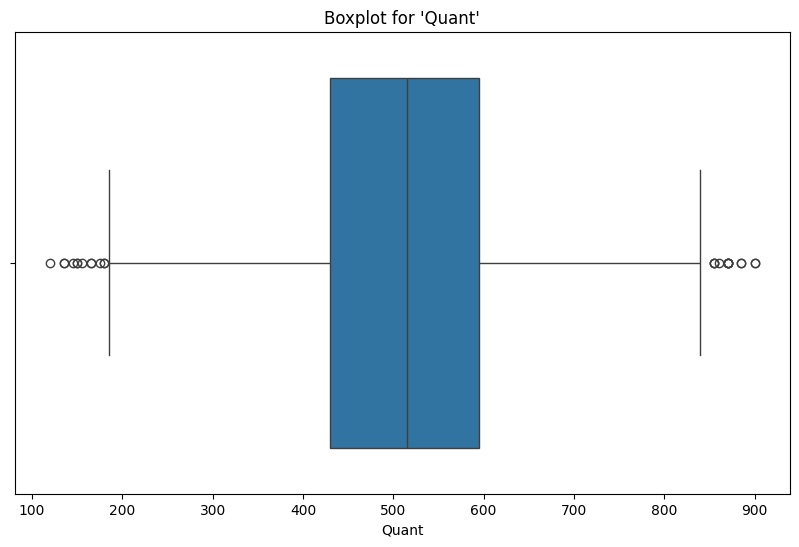

Summary Statistics for 'Domain':
count    3752.000000
mean        0.609525
std         0.273159
min         0.002750
25%         0.376060
50%         0.649390
75%         0.842248
max         0.999910
Name: Domain, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


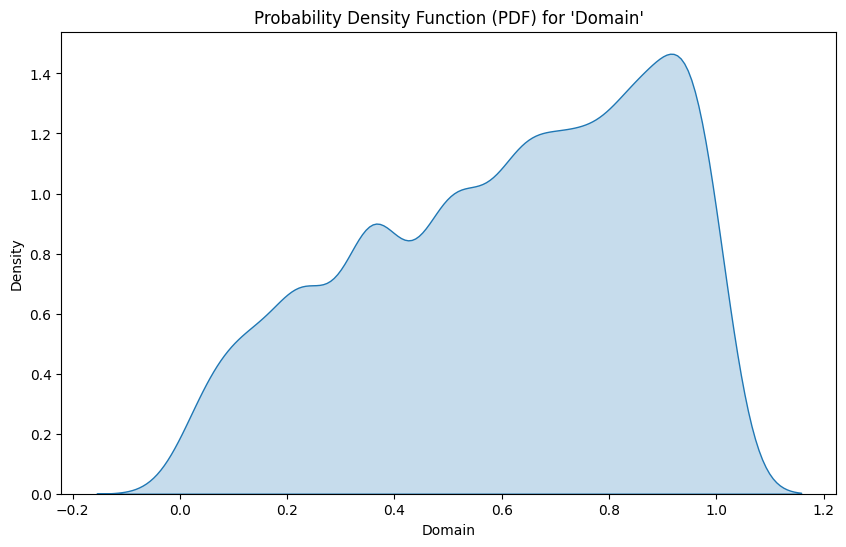

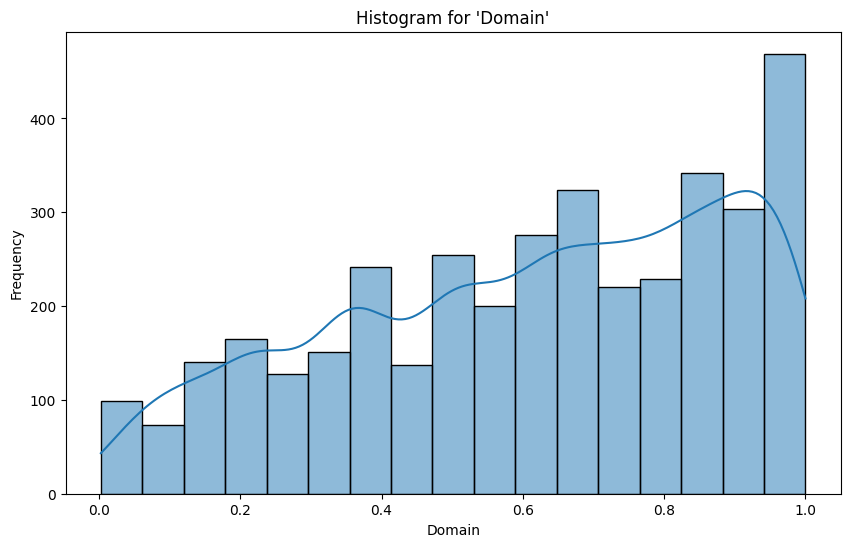

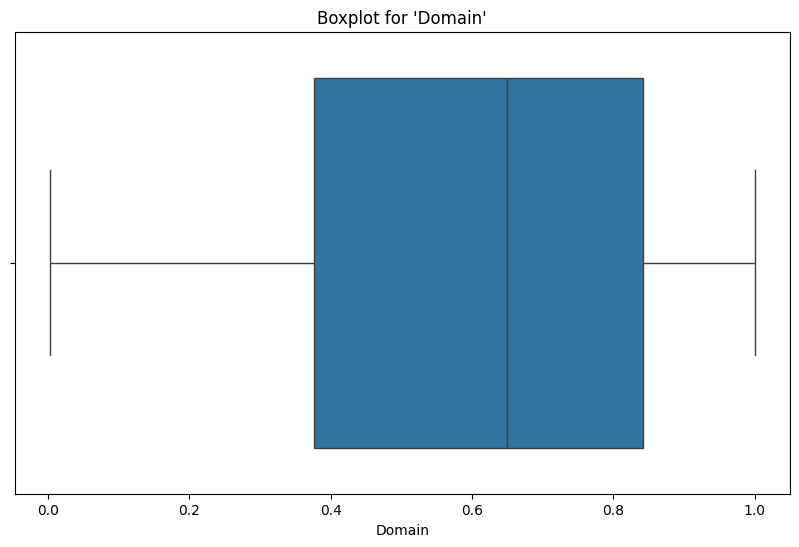

Summary Statistics for 'ComputerProgramming':
count    3130.000000
mean      451.301278
std        97.158687
min       105.000000
25%       385.000000
50%       455.000000
75%       515.000000
max       840.000000
Name: ComputerProgramming, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


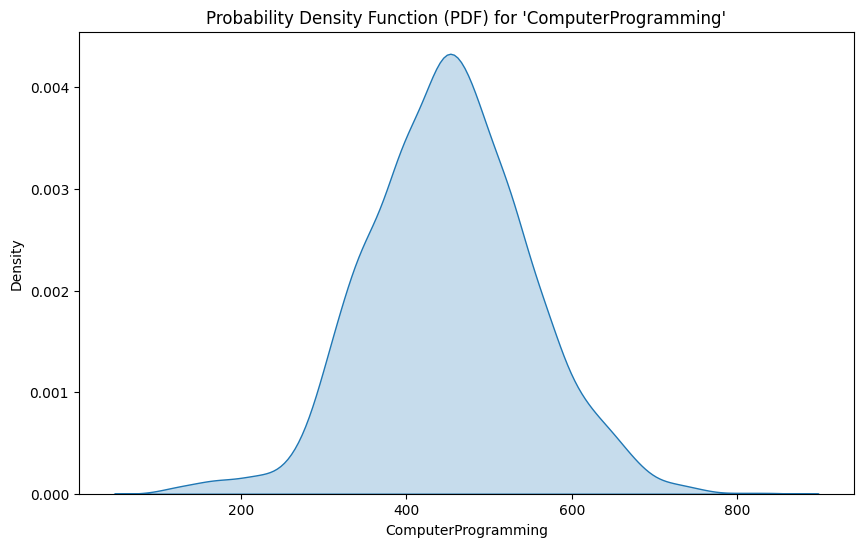

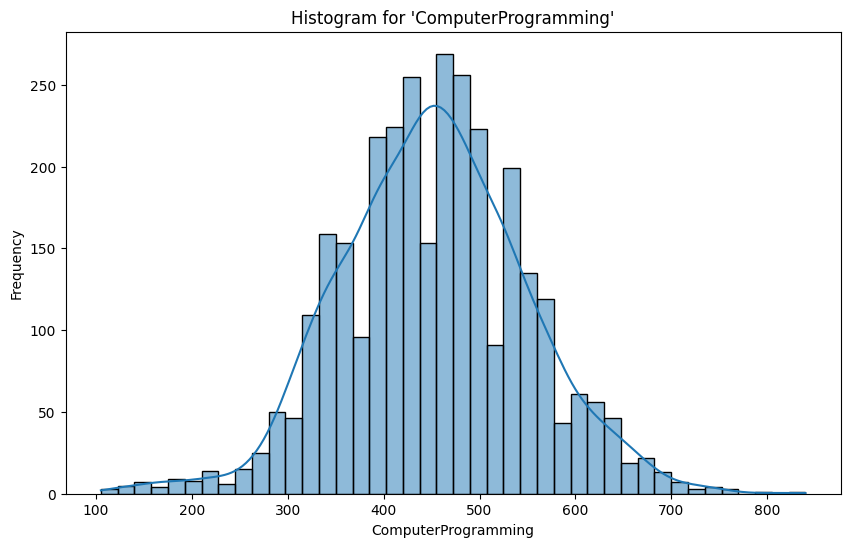

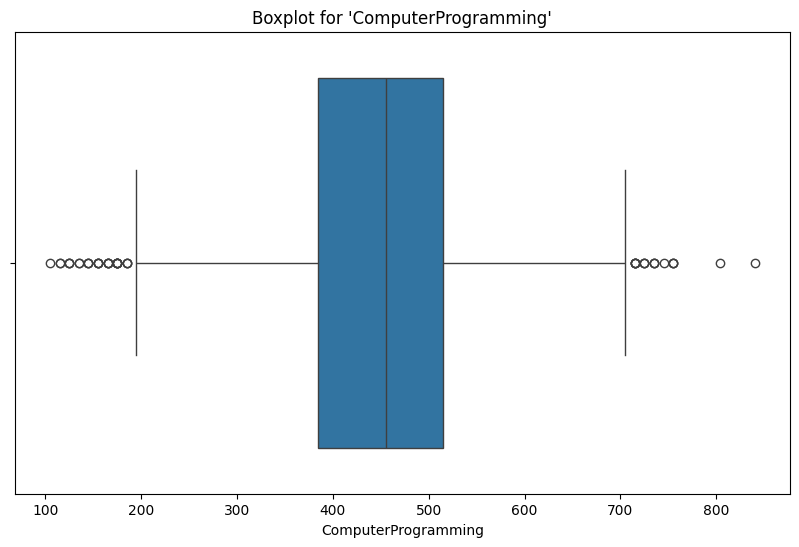

Summary Statistics for 'ElectronicsAndSemicon':
count    1144.000000
mean      335.644231
std        81.194840
min       133.000000
25%       292.000000
50%       333.000000
75%       388.000000
max       612.000000
Name: ElectronicsAndSemicon, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


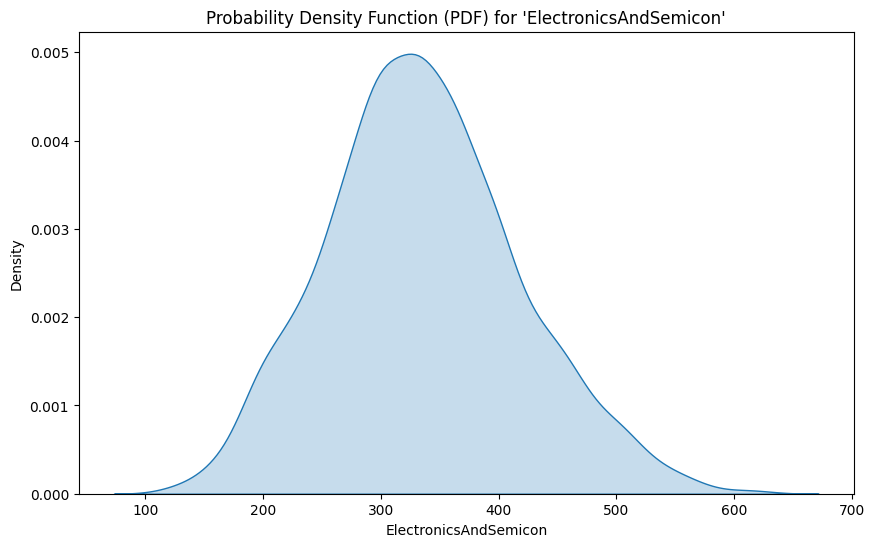

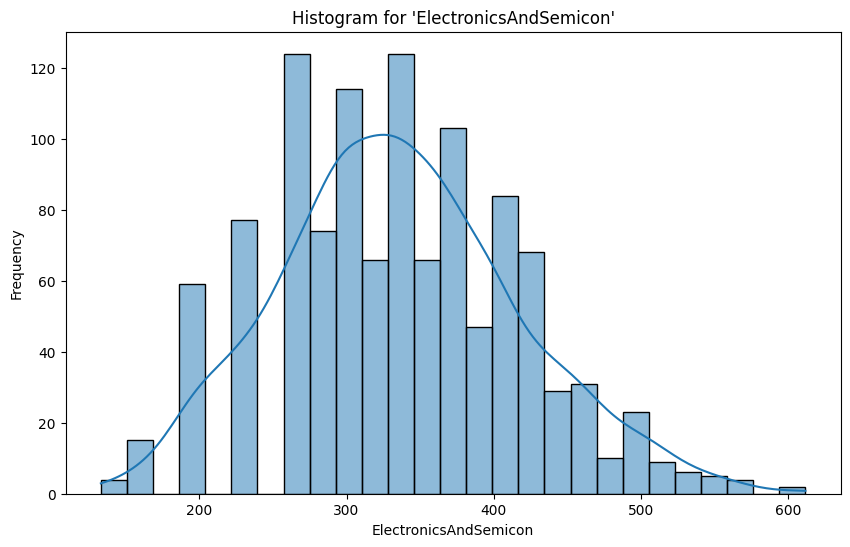

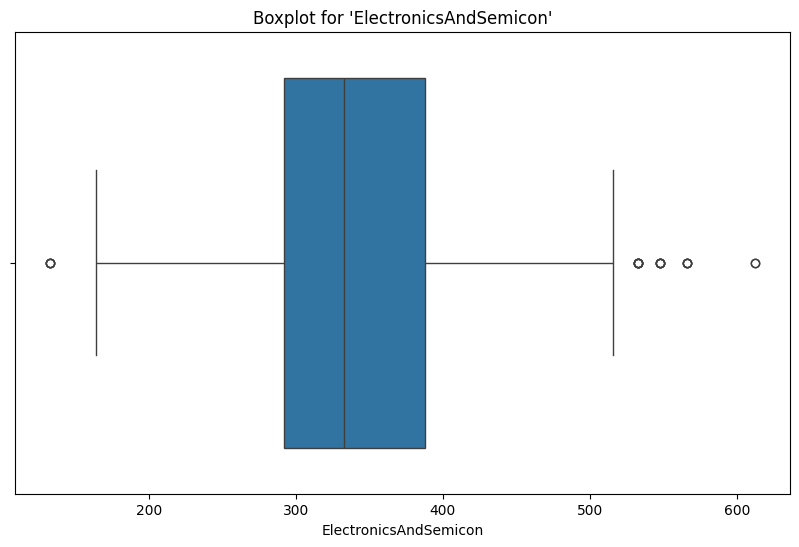

Summary Statistics for 'ComputerScience':
count    902.000000
mean     405.636364
std       89.960805
min      130.000000
25%      346.000000
50%      407.000000
75%      469.000000
max      715.000000
Name: ComputerScience, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


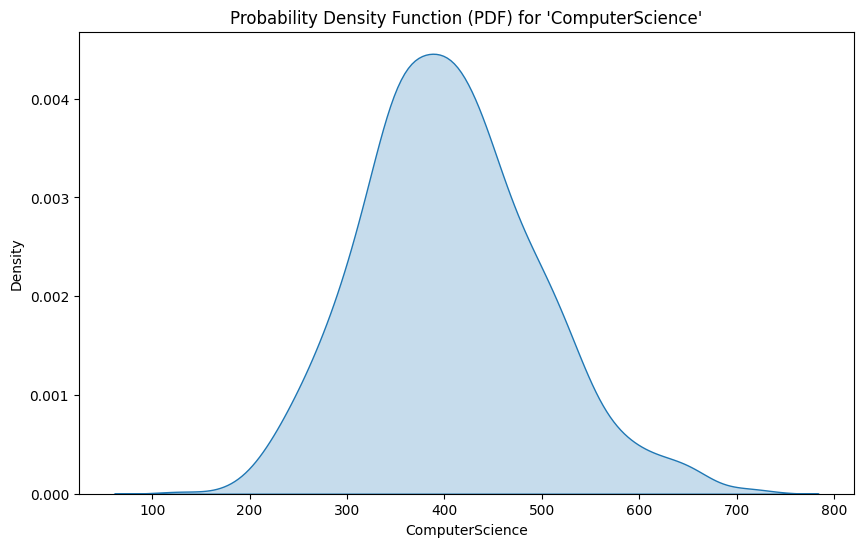

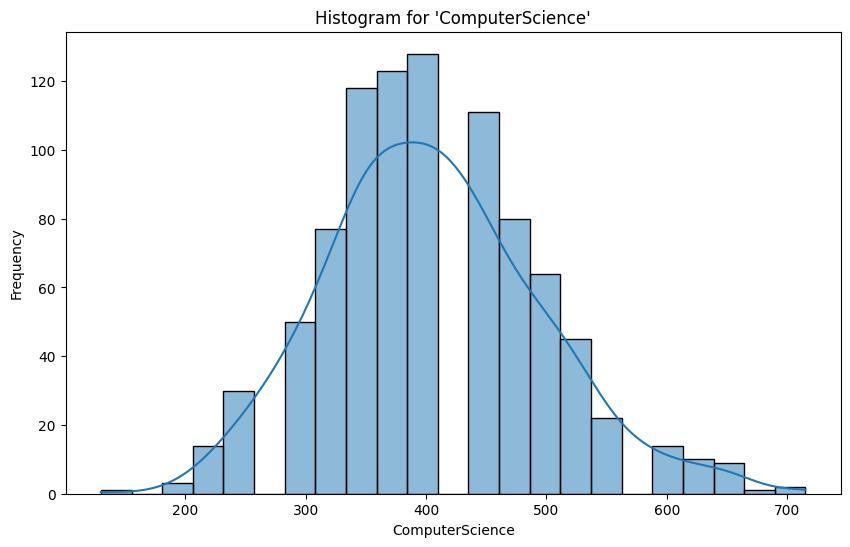

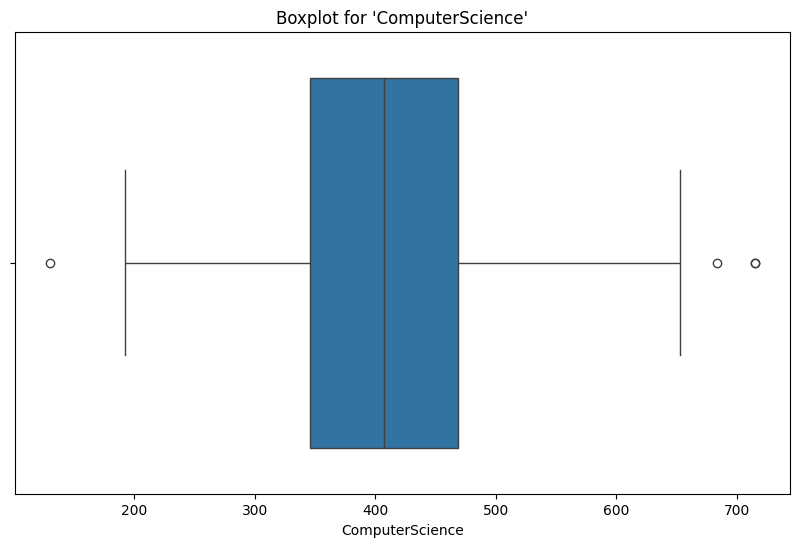

Summary Statistics for 'MechanicalEngg':
count    235.000000
mean     406.876596
std       84.894993
min      180.000000
25%      362.000000
50%      407.000000
75%      446.000000
max      623.000000
Name: MechanicalEngg, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


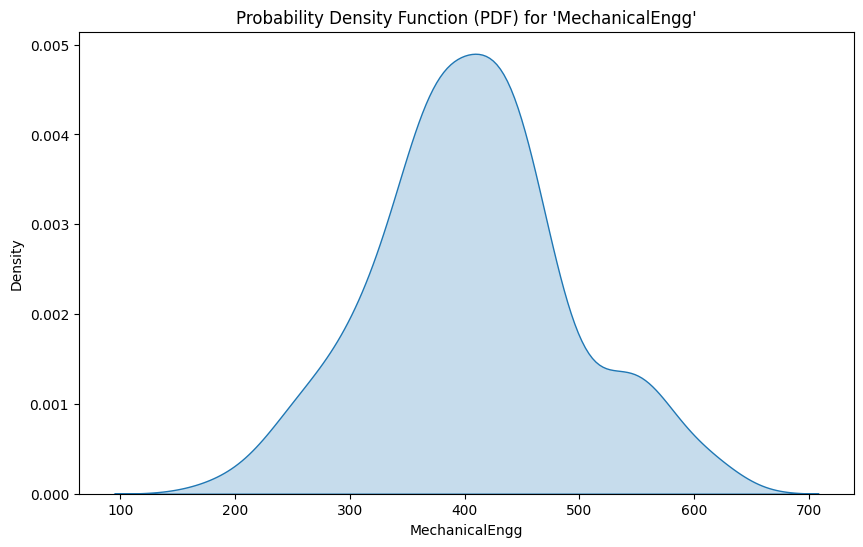

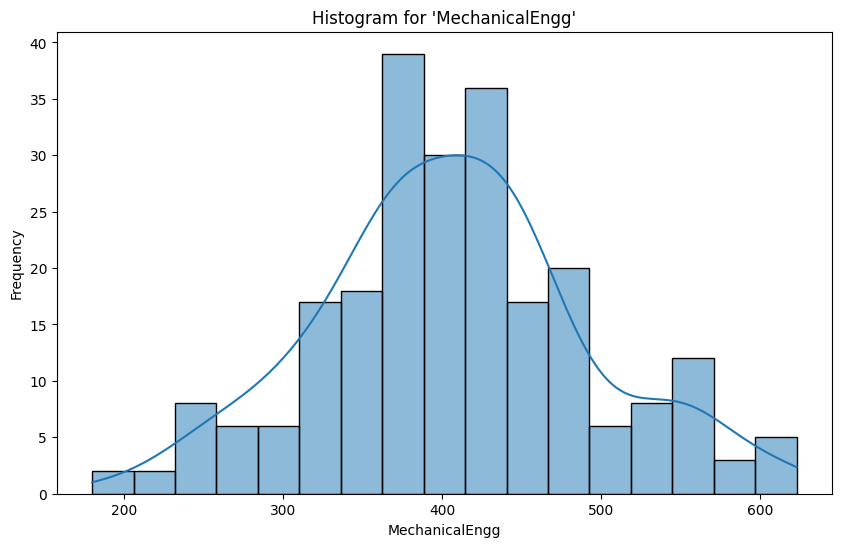

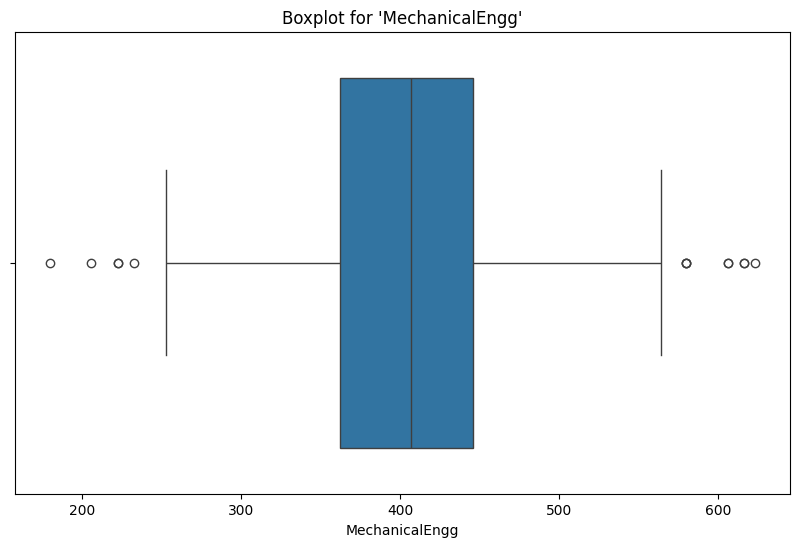

Summary Statistics for 'ElectricalEngg':
count    161.000000
mean     433.037267
std       98.515537
min      206.000000
25%      366.000000
50%      433.000000
75%      500.000000
max      676.000000
Name: ElectricalEngg, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


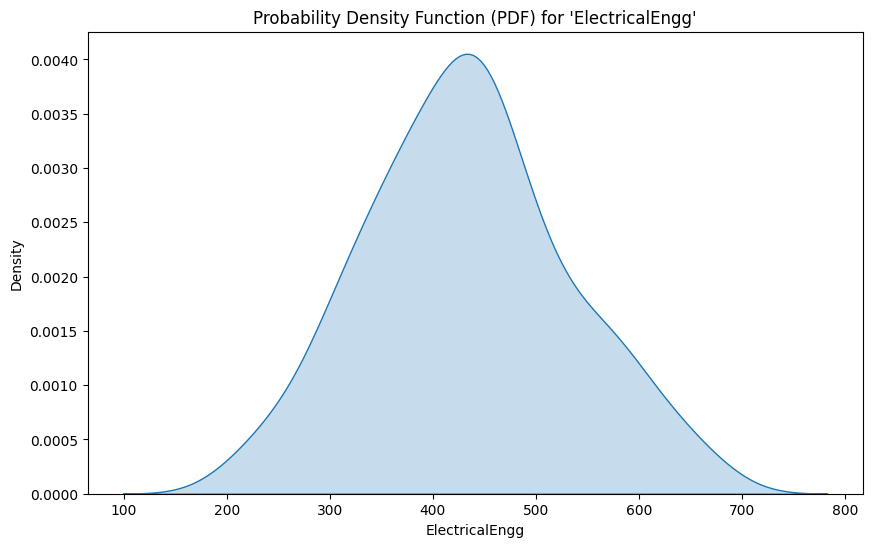

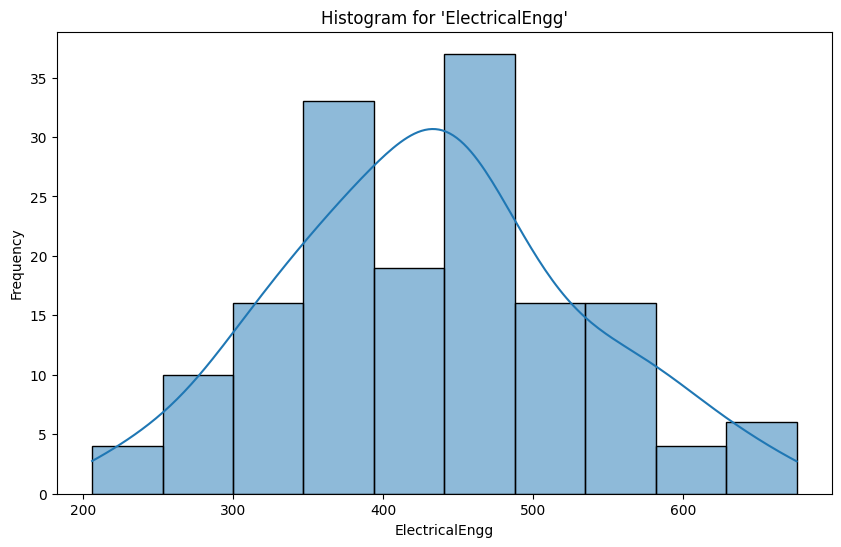

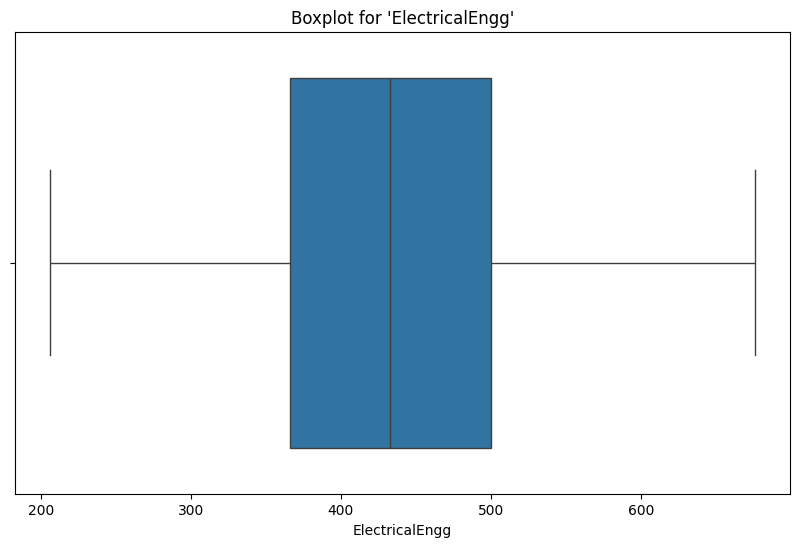

Summary Statistics for 'TelecomEngg':
count    374.000000
mean     350.173797
std       75.661864
min      153.000000
25%      287.500000
50%      356.000000
75%      393.000000
max      548.000000
Name: TelecomEngg, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


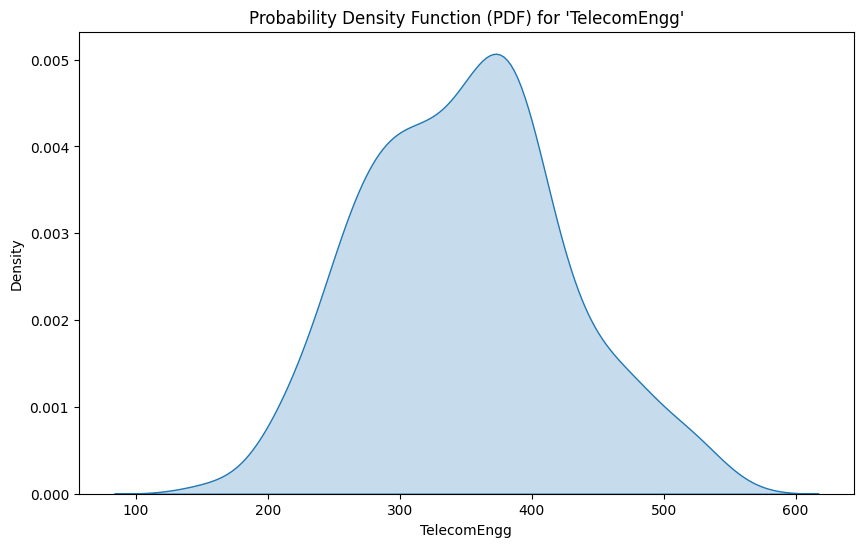

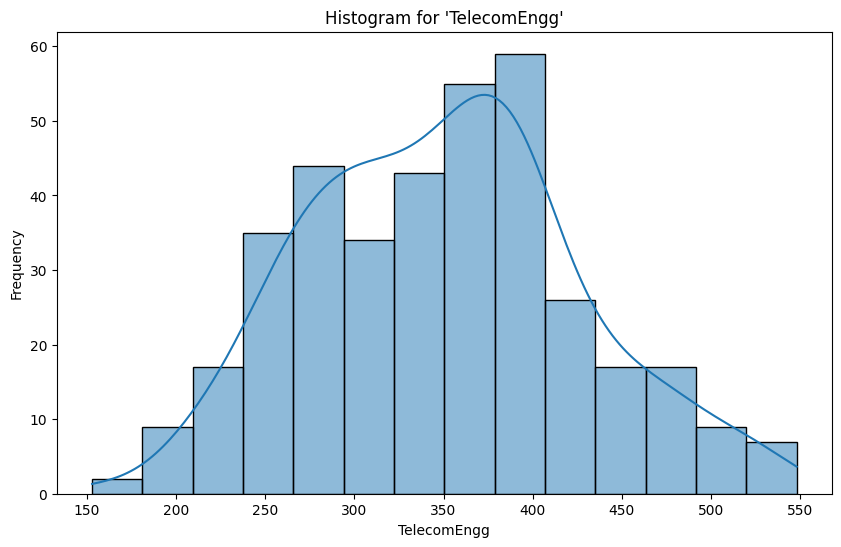

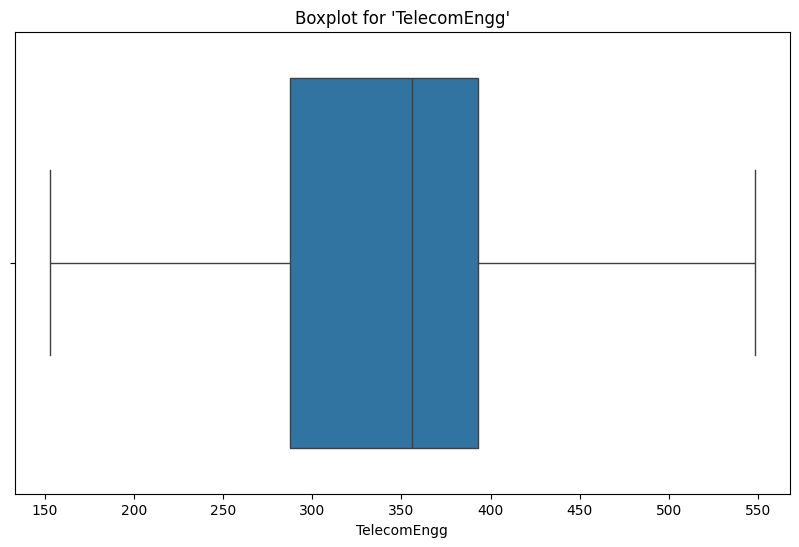

Summary Statistics for 'CivilEngg':
count     42.000000
mean     349.666667
std       79.784670
min      166.000000
25%      292.000000
50%      348.000000
75%      388.000000
max      516.000000
Name: CivilEngg, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


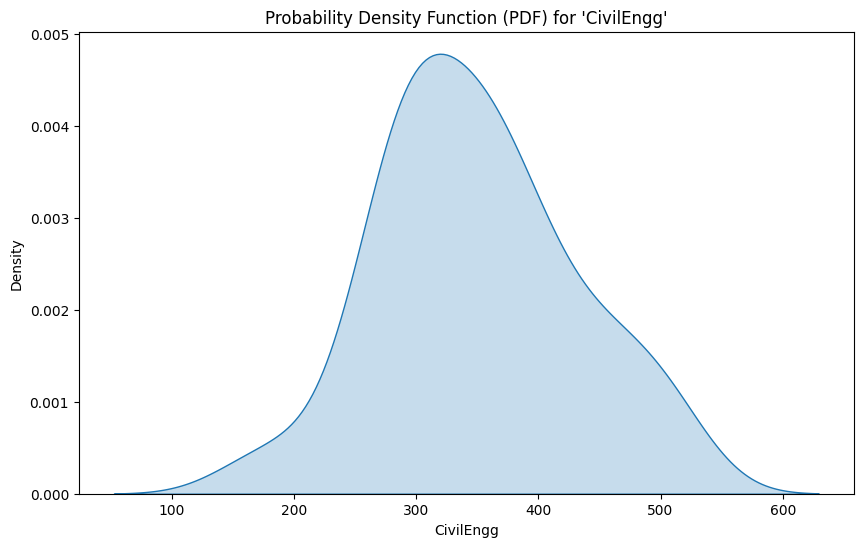

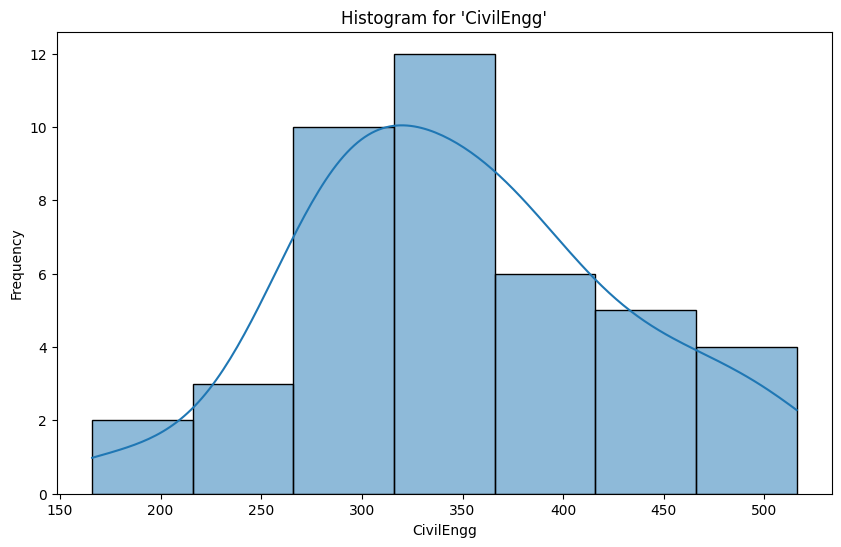

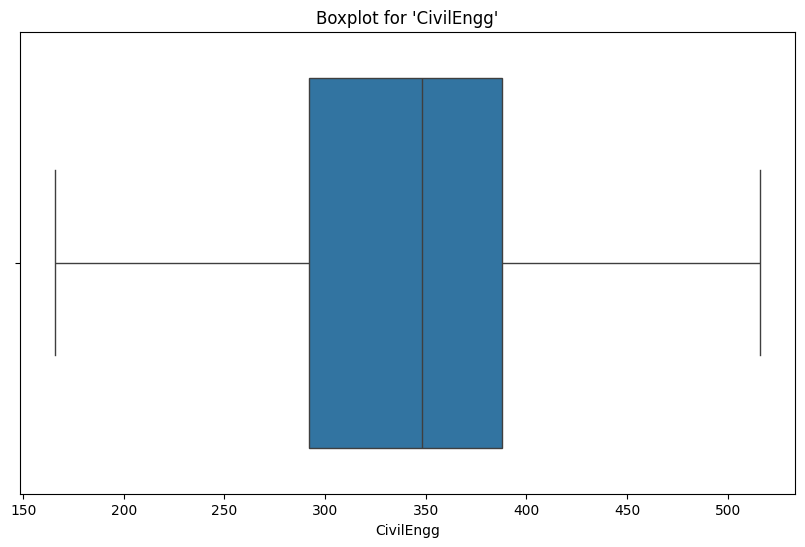

Summary Statistics for 'conscientiousness':
count    3998.000000
mean       -0.037831
std         1.028666
min        -4.126700
25%        -0.713525
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


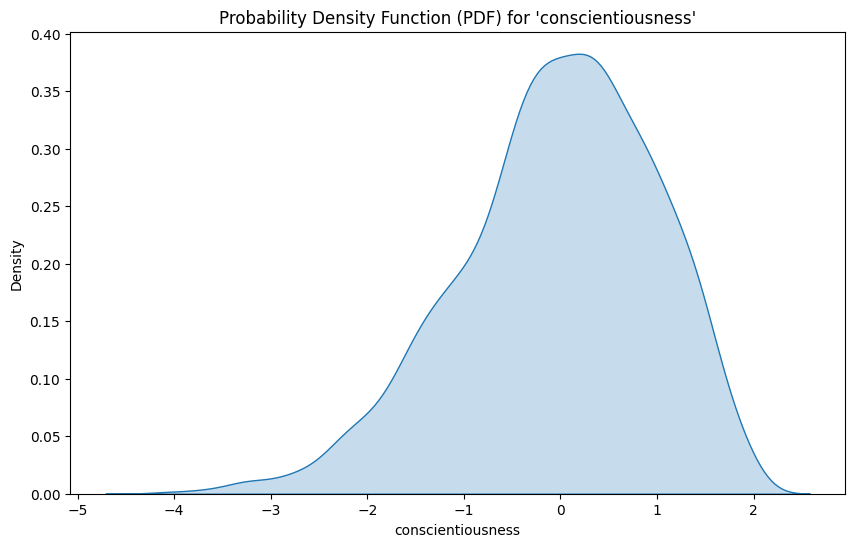

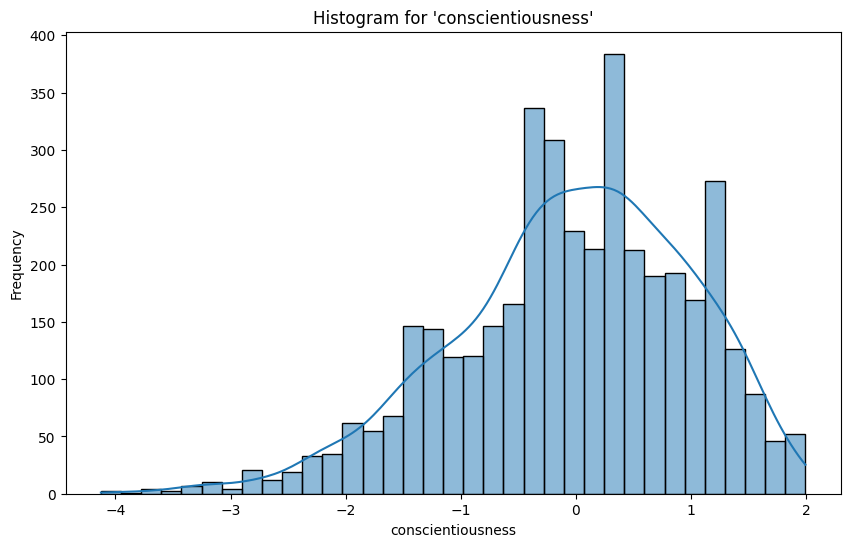

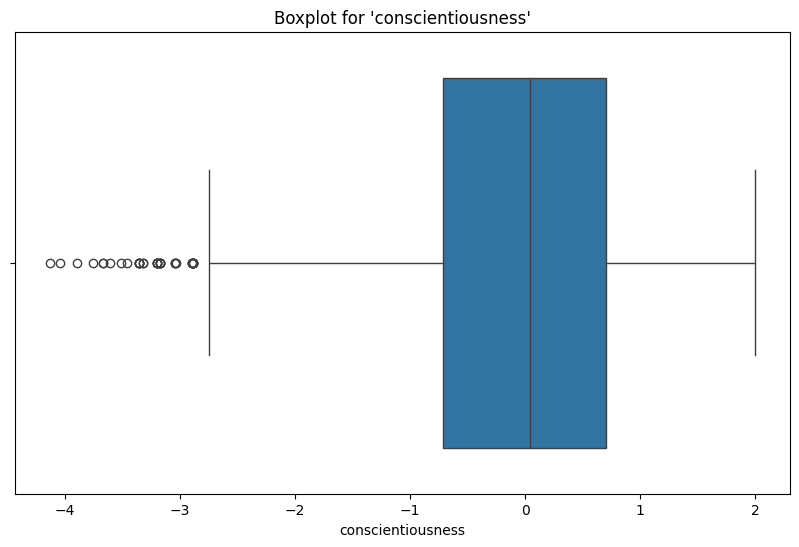

Summary Statistics for 'agreeableness':
count    3998.000000
mean        0.146496
std         0.941782
min        -5.781600
25%        -0.287100
50%         0.212400
75%         0.812800
max         1.904800
Name: agreeableness, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


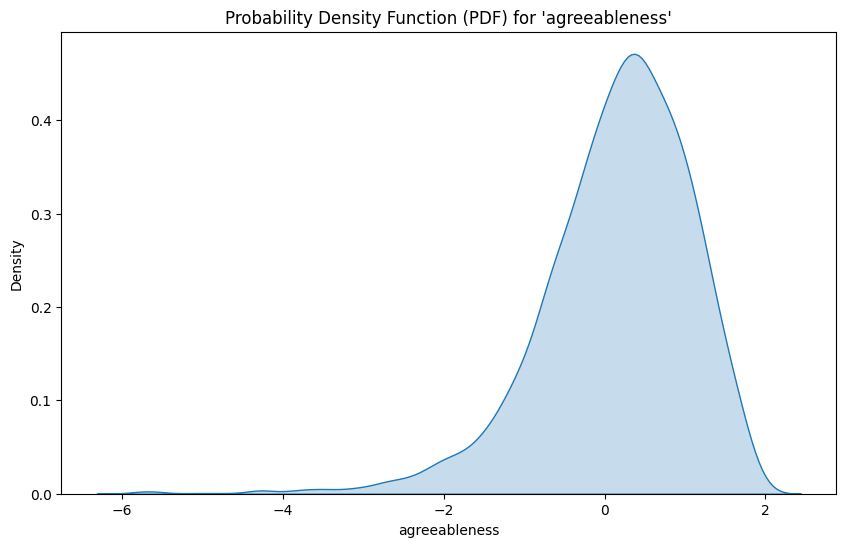

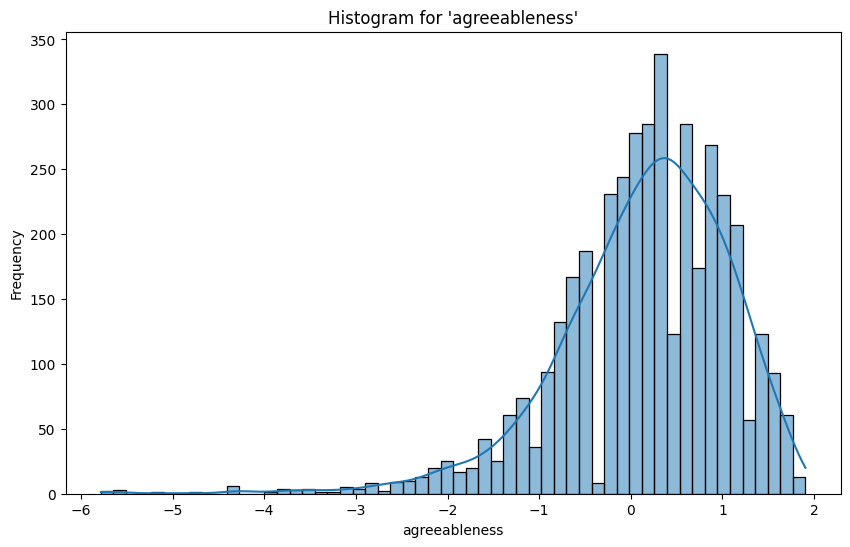

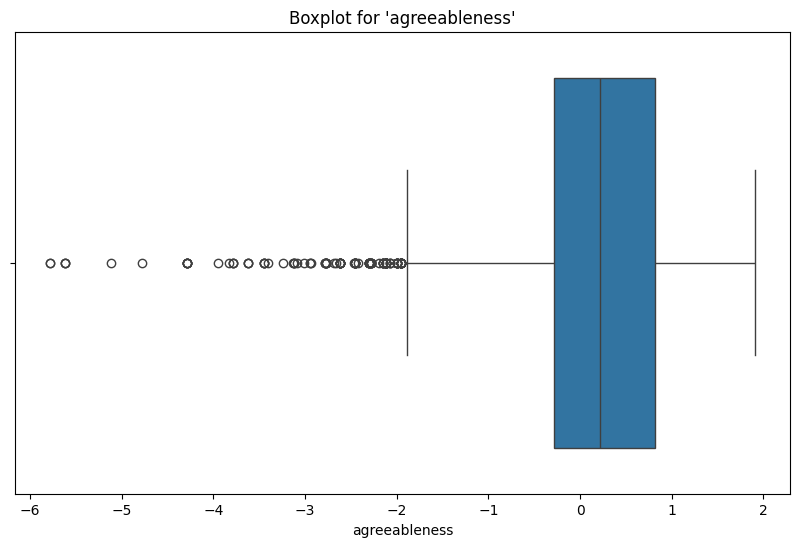

Summary Statistics for 'extraversion':
count    3998.000000
mean        0.002763
std         0.951471
min        -4.600900
25%        -0.604800
50%         0.091400
75%         0.672000
max         2.535400
Name: extraversion, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


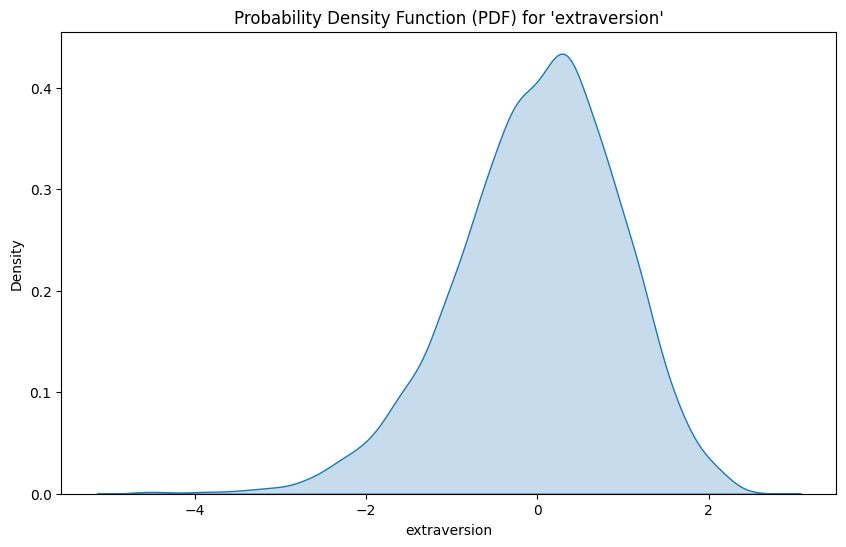

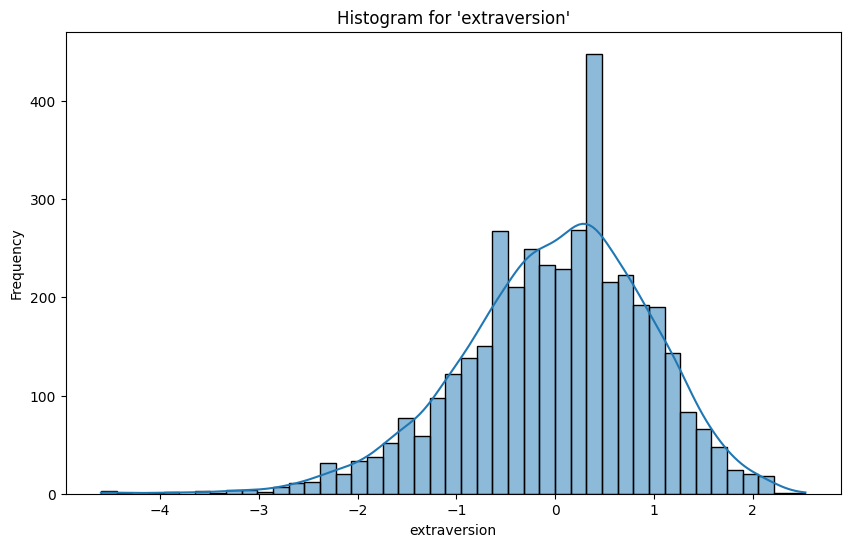

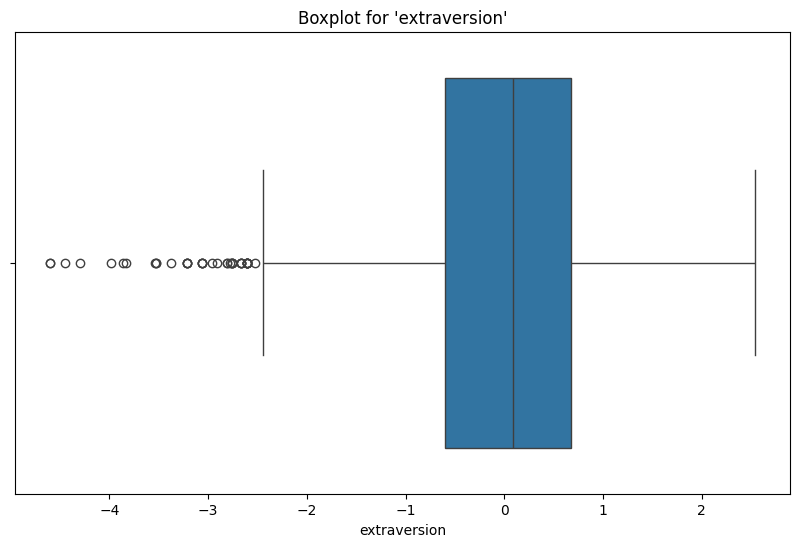

Summary Statistics for 'nueroticism':
count    3998.000000
mean       -0.169033
std         1.007580
min        -2.643000
25%        -0.868200
50%        -0.234400
75%         0.526200
max         3.352500
Name: nueroticism, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


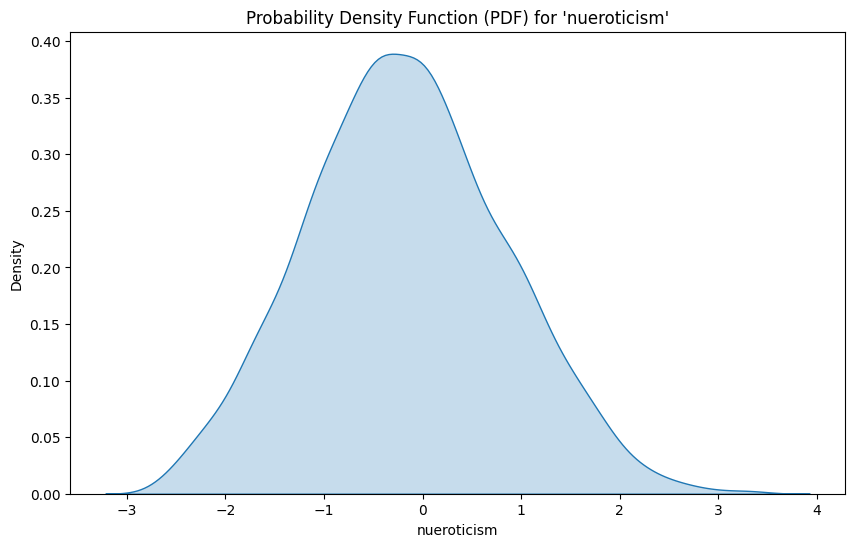

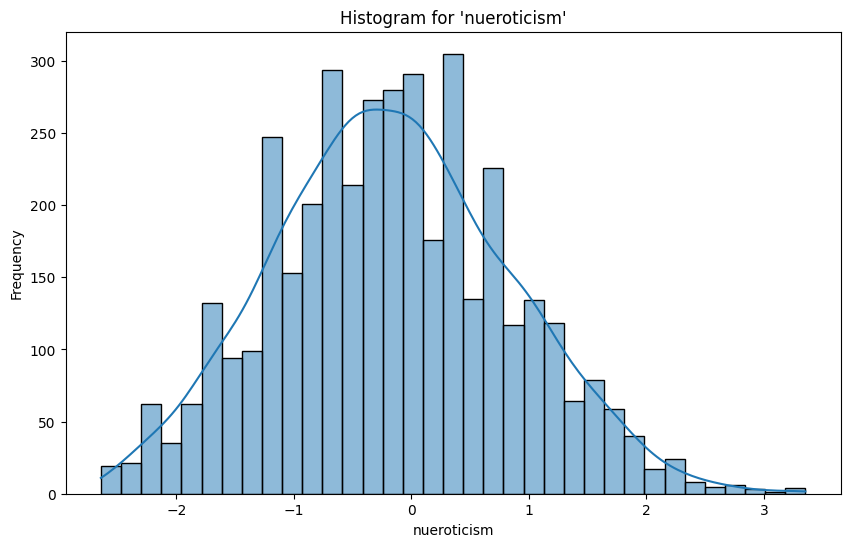

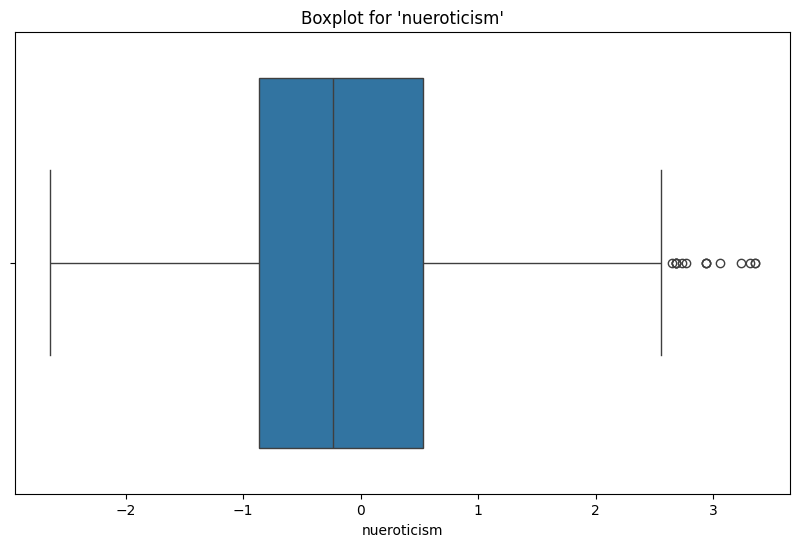

Summary Statistics for 'openess_to_experience':
count    3998.000000
mean       -0.138110
std         1.008075
min        -7.375700
25%        -0.669200
50%        -0.094300
75%         0.502400
max         1.822400
Name: openess_to_experience, dtype: float64



<ipython-input-64-388c0c07f0c6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


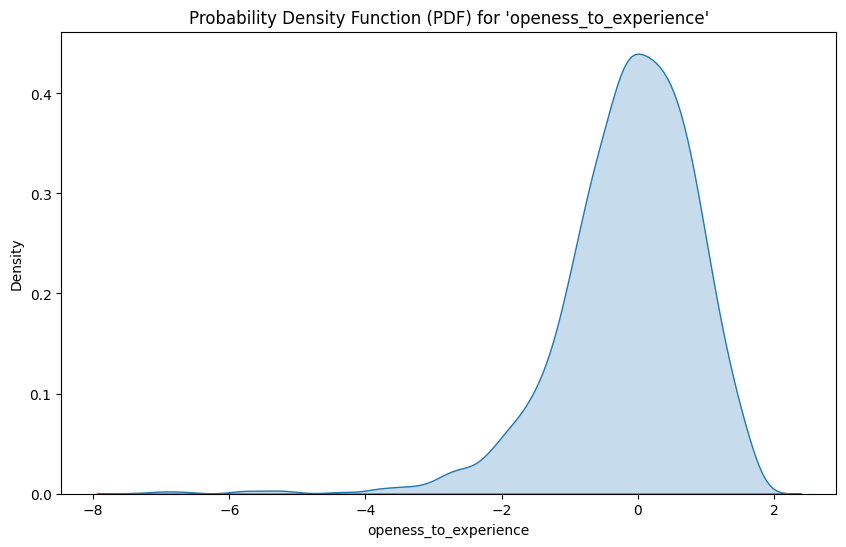

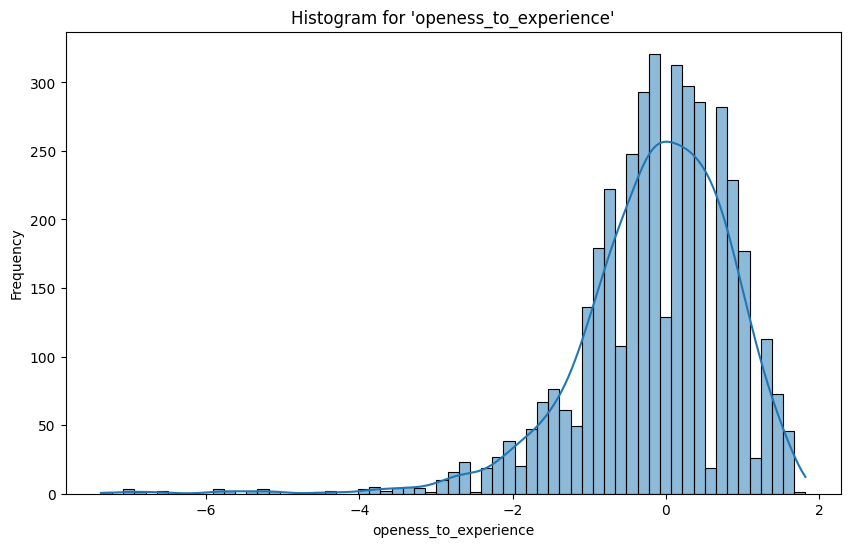

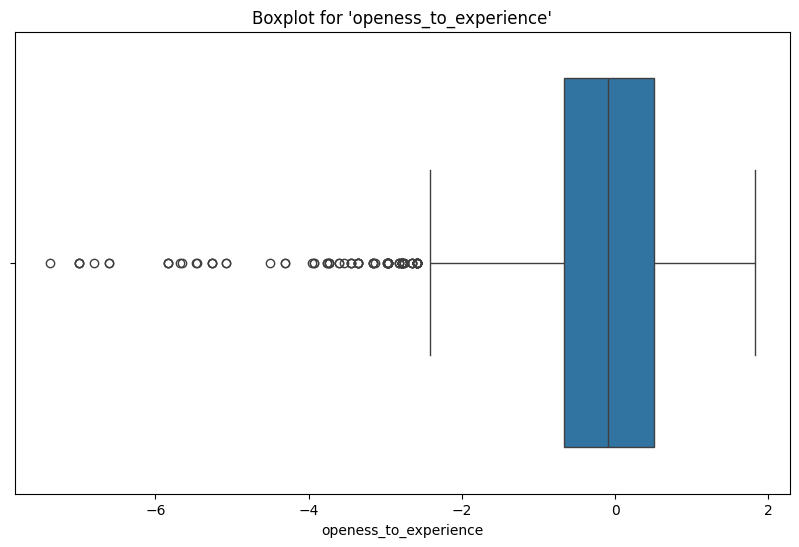

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA',
                     'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
                     'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
                     'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
                     'conscientiousness', 'agreeableness', 'extraversion',
                     'nueroticism', 'openess_to_experience']

# Define the number of columns and rows for subplots
for column in numerical_columns:
    # Summary statistics
    print(f"Summary Statistics for '{column}':")
    print(df[column].describe())
    print("")

    # PDF (Probability Density Function)
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f"Probability Density Function (PDF) for '{column}'")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram for '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for '{column}'")
    plt.xlabel(column)
    plt.show()

In [65]:
count_above_15_lacs = df[df['Salary'] > 2.0e6]['ID'].nunique()

# Print the count
print("Count of IDs with salary above 15 lacs:", count_above_15_lacs)

Count of IDs with salary above 15 lacs: 9


In [66]:
max_salary_threshold = 1e6
df['Salary'] = df['Salary'].apply(lambda x: max_salary_threshold if x > max_salary_threshold else x)

# Drop the rows with salary values exceeding the threshold
df = df[df['Salary'] <= max_salary_threshold]

# Check the summary statistics of the 'Salary' column after the operation
print(df['Salary'].describe())

count       3998.000000
mean      300666.333167
std       155887.149325
min        35000.000000
25%       180000.000000
50%       300000.000000
75%       370000.000000
max      1000000.000000
Name: Salary, dtype: float64


In [67]:
# List of columns to check for values less than -4
columns_to_check = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Drop rows with values less than -4 in the specified columns
for column in columns_to_check:
    df = df[df[column] >= -4]

# Check the summary statistics of the specified columns after dropping rows
print(df[columns_to_check].describe())


       conscientiousness  agreeableness  extraversion  nueroticism  \
count        3973.000000    3973.000000   3973.000000  3973.000000   
mean           -0.021557       0.171157      0.018812    -0.166982   
std             1.007182       0.883228      0.926520     1.008396   
min            -3.663100      -3.828400     -3.863600    -2.643000   
25%            -0.589900      -0.287100     -0.604800    -0.868200   
50%             0.046400       0.212400      0.091400    -0.234400   
75%             0.702700       0.812800      0.672000     0.526200   
max             1.995300       1.904800      2.535400     3.352500   

       openess_to_experience  
count            3973.000000  
mean               -0.105746  
std                 0.915590  
min                -3.960500  
25%                -0.669200  
50%                -0.050600  
75%                 0.502400  
max                 1.822400  


Summary Statistics for 'Salary':
count       3973.000000
mean      301132.393657
std       156029.469840
min        35000.000000
25%       180000.000000
50%       300000.000000
75%       370000.000000
max      1000000.000000
Name: Salary, dtype: float64



<ipython-input-68-d07261ffd6bf>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


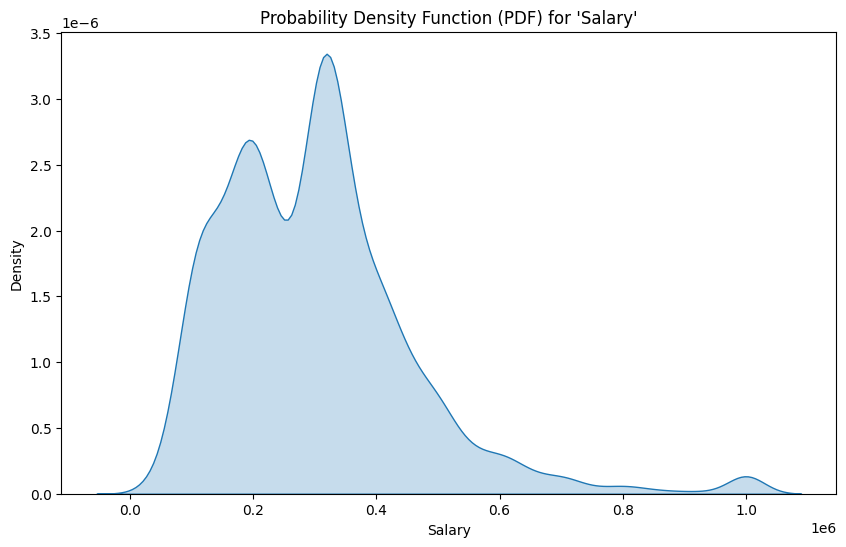

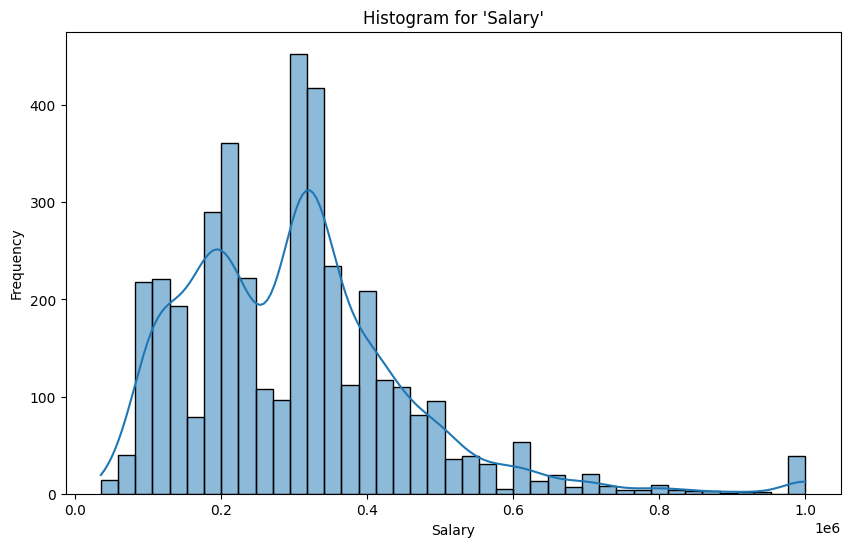

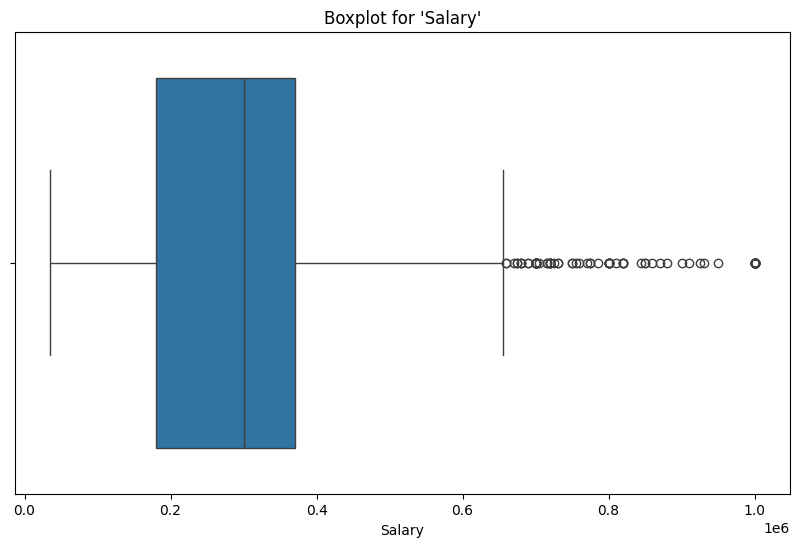

Summary Statistics for 'conscientiousness':
count    3973.000000
mean       -0.021557
std         1.007182
min        -3.663100
25%        -0.589900
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64



<ipython-input-68-d07261ffd6bf>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


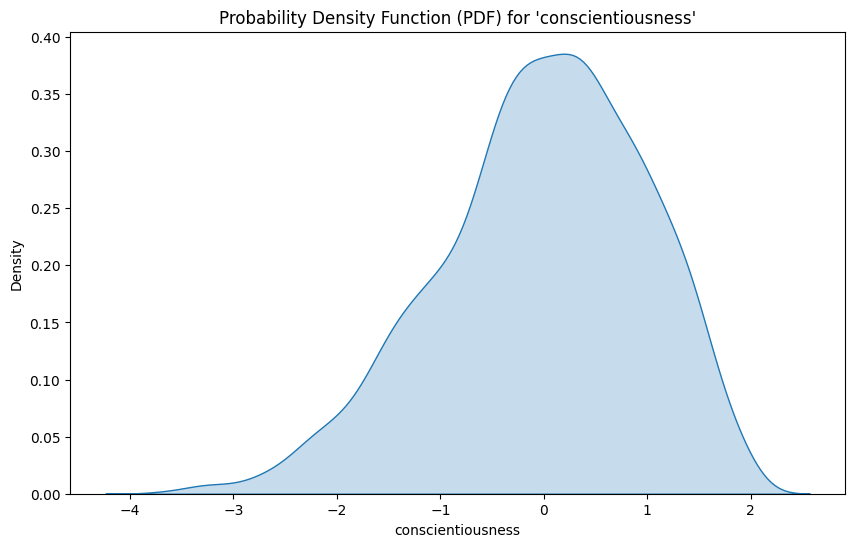

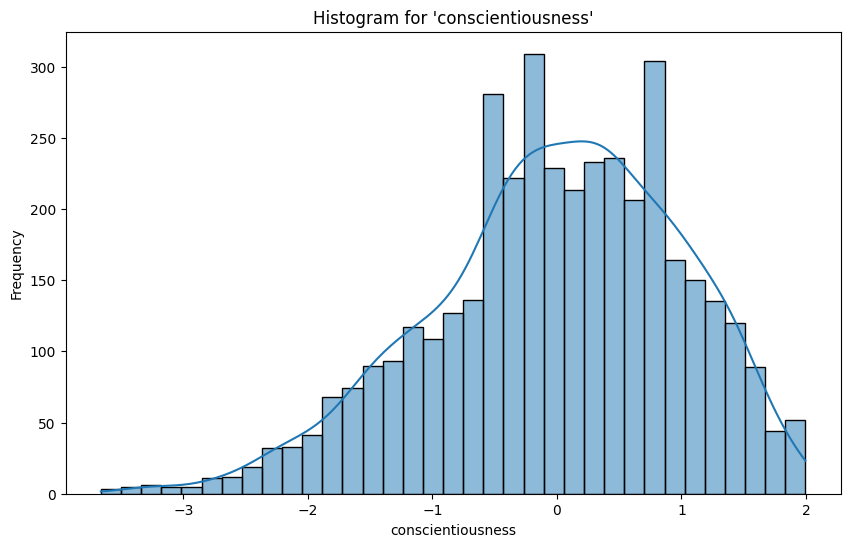

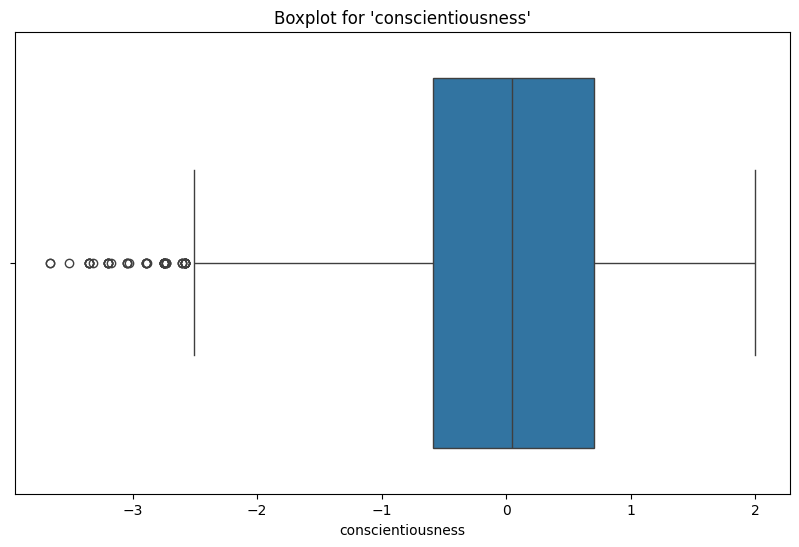

Summary Statistics for 'agreeableness':
count    3973.000000
mean        0.171157
std         0.883228
min        -3.828400
25%        -0.287100
50%         0.212400
75%         0.812800
max         1.904800
Name: agreeableness, dtype: float64



<ipython-input-68-d07261ffd6bf>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


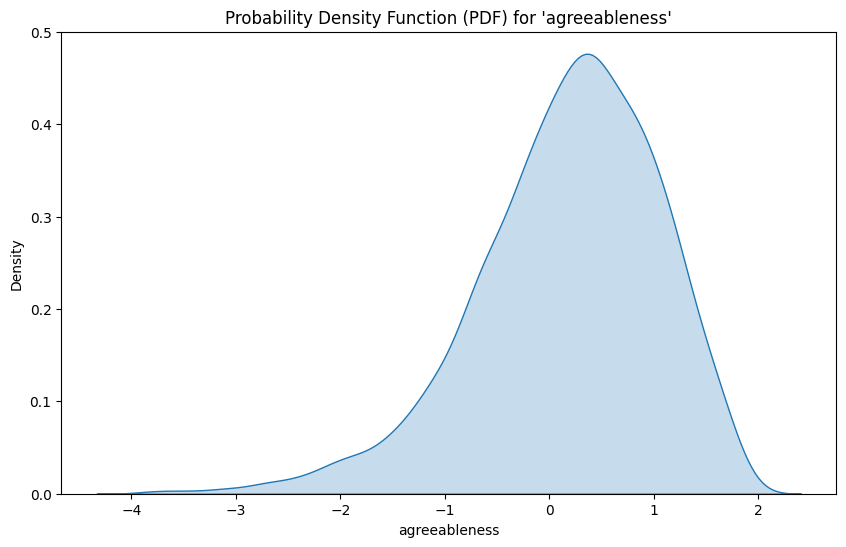

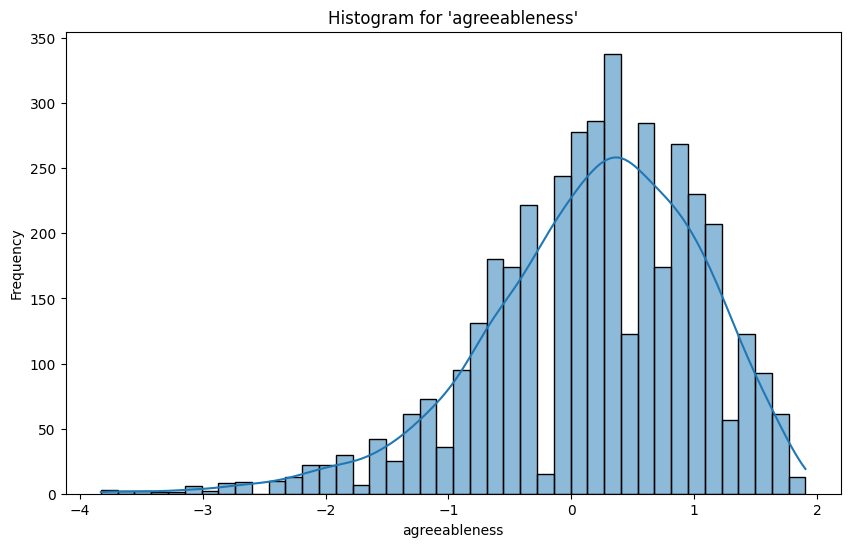

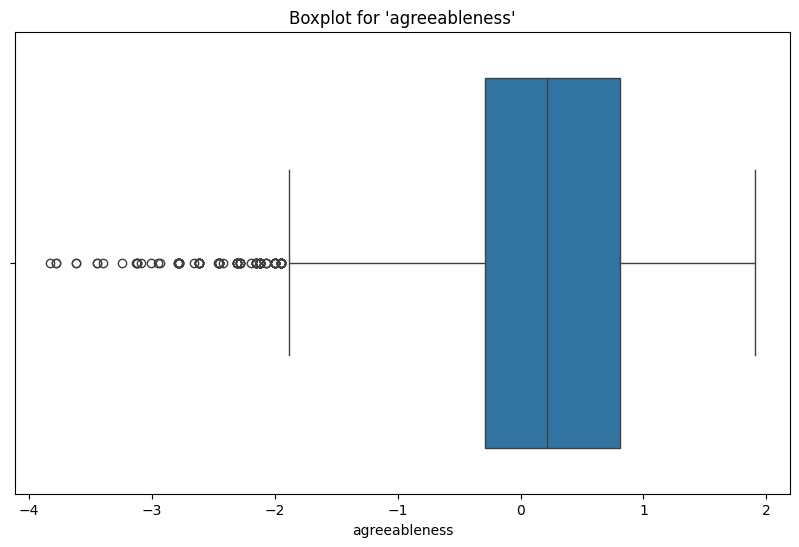

Summary Statistics for 'extraversion':
count    3973.000000
mean        0.018812
std         0.926520
min        -3.863600
25%        -0.604800
50%         0.091400
75%         0.672000
max         2.535400
Name: extraversion, dtype: float64



<ipython-input-68-d07261ffd6bf>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


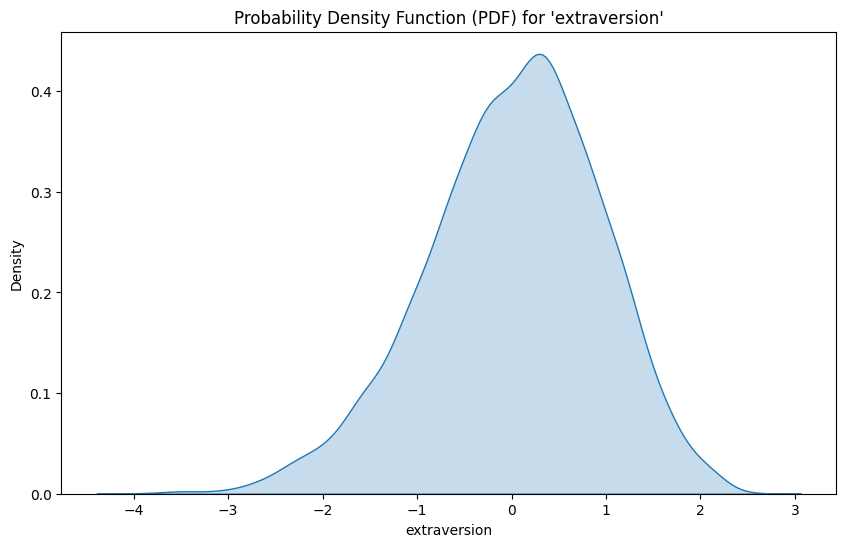

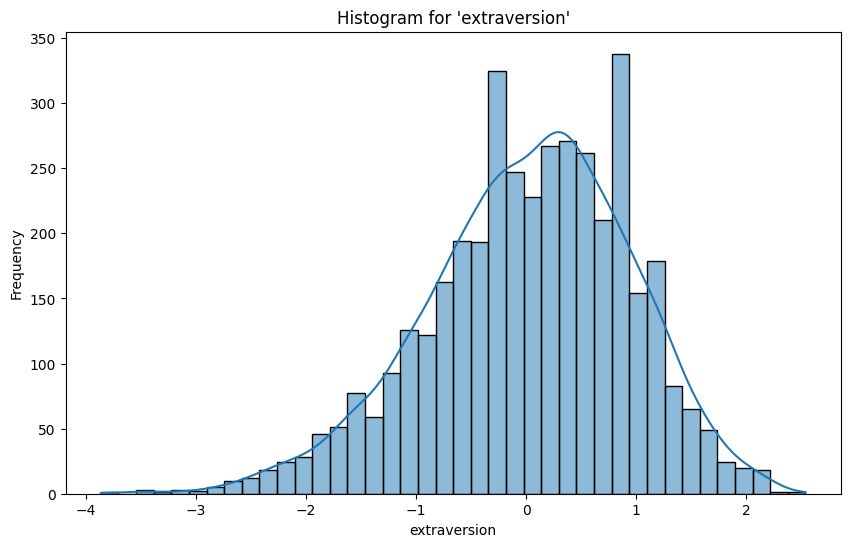

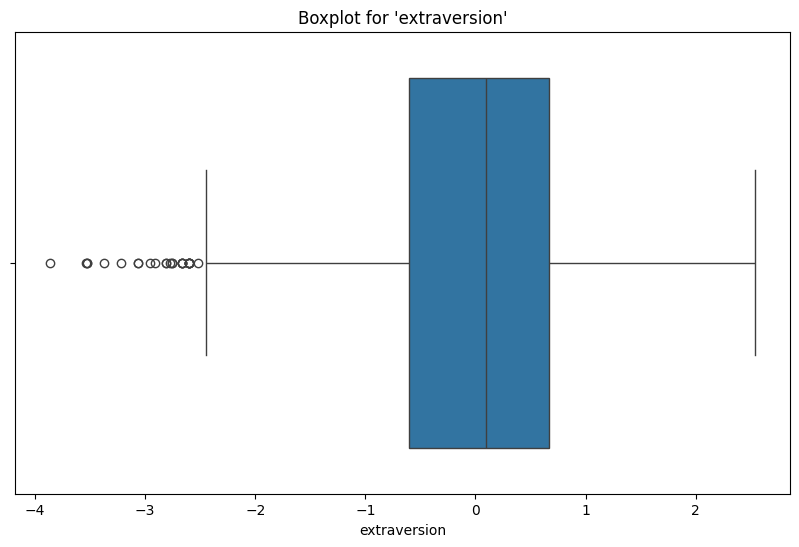

Summary Statistics for 'nueroticism':
count    3973.000000
mean       -0.166982
std         1.008396
min        -2.643000
25%        -0.868200
50%        -0.234400
75%         0.526200
max         3.352500
Name: nueroticism, dtype: float64



<ipython-input-68-d07261ffd6bf>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


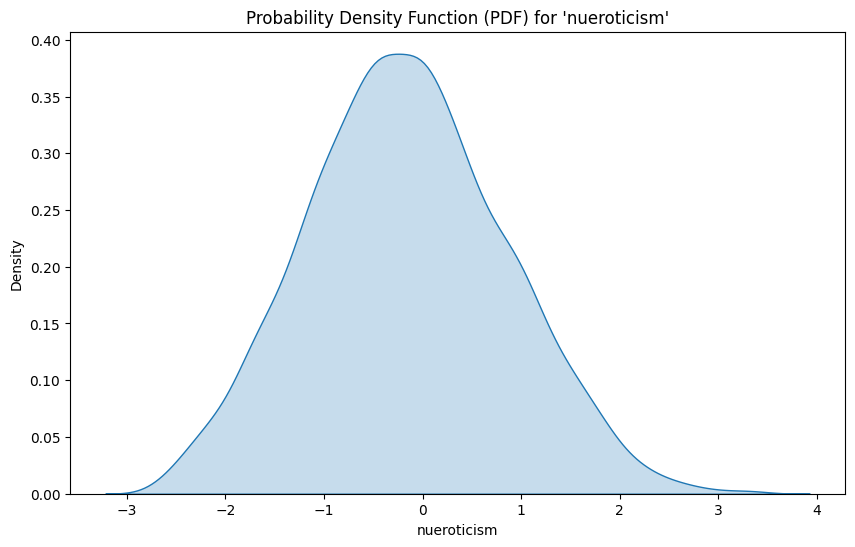

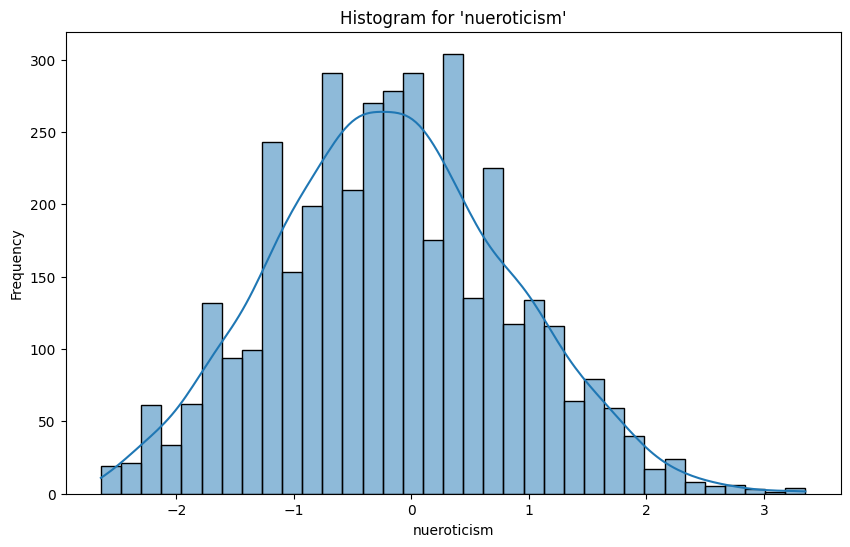

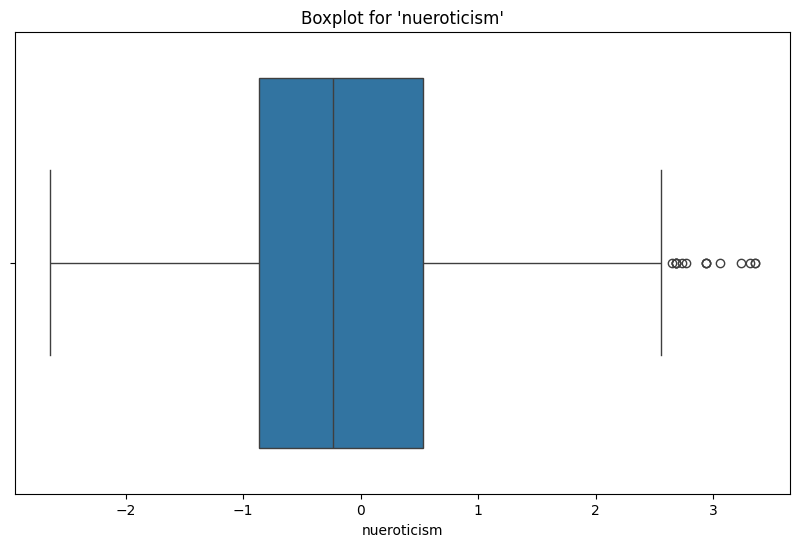

Summary Statistics for 'openess_to_experience':
count    3973.000000
mean       -0.105746
std         0.915590
min        -3.960500
25%        -0.669200
50%        -0.050600
75%         0.502400
max         1.822400
Name: openess_to_experience, dtype: float64



<ipython-input-68-d07261ffd6bf>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


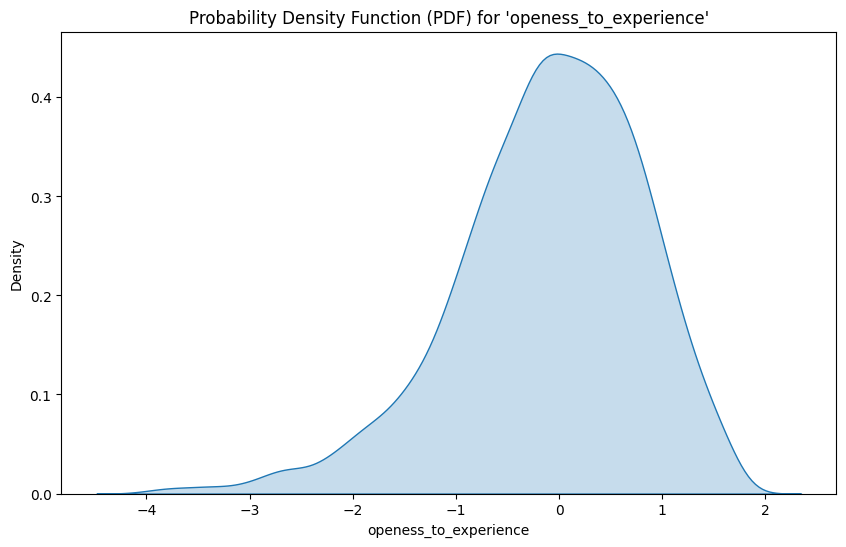

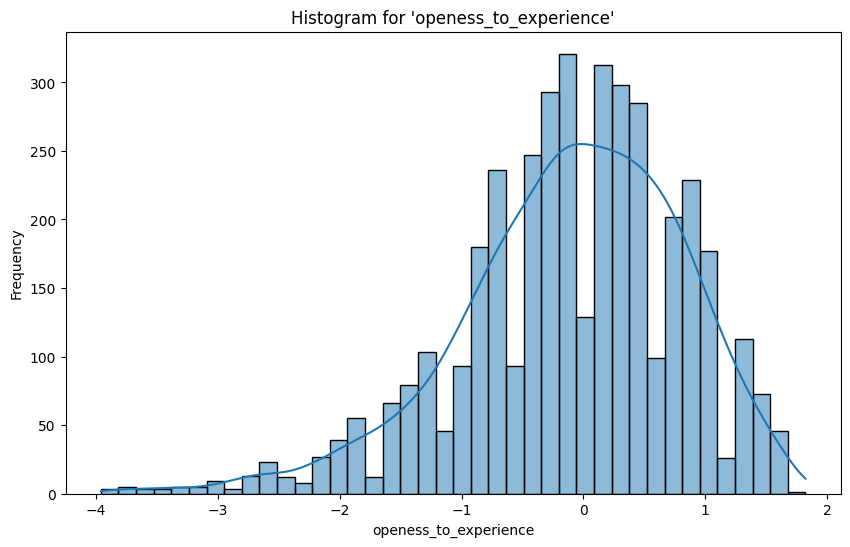

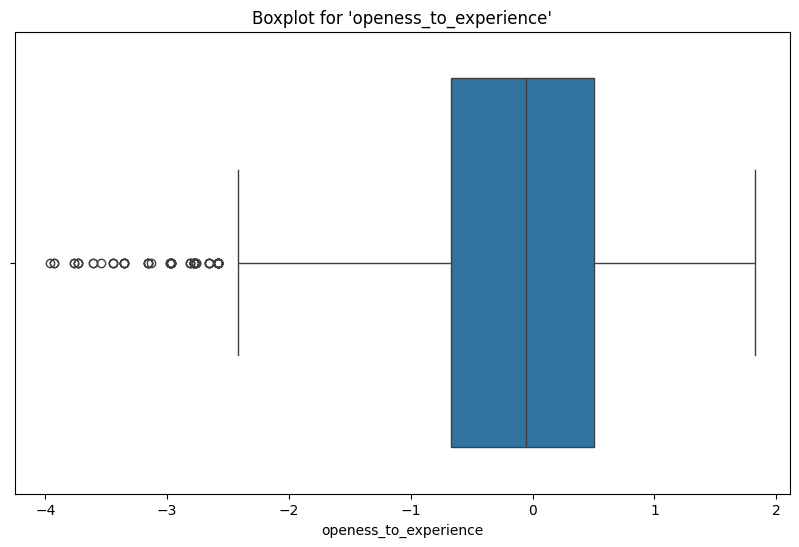

In [68]:
updated_columns = ['Salary','conscientiousness', 'agreeableness', 'extraversion',
                     'nueroticism', 'openess_to_experience']

# Define the number of columns and rows for subplots
for column in updated_columns:
    # Summary statistics
    print(f"Summary Statistics for '{column}':")
    print(df[column].describe())
    print("")

    # PDF (Probability Density Function)
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f"Probability Density Function (PDF) for '{column}'")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram for '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for '{column}'")
    plt.xlabel(column)
    plt.show()

**Categorical**

In [69]:
specialization_counts = df['Specialization'].value_counts()

# Print total number of unique specializations and their counts
print("Total number of unique specializations:", len(specialization_counts))
print("Specialization Counts:")
print(specialization_counts)

Total number of unique specializations: 46
Specialization Counts:
electronics and communication engineering      874
computer science & engineering                 741
information technology                         657
computer engineering                           597
computer application                           243
mechanical engineering                         199
electronics and electrical engineering         196
electronics & telecommunications               118
electrical engineering                          80
electronics & instrumentation eng               31
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 26
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electron

<ipython-input-70-17aa8d5b95dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Specialization', data=df[df['Specialization'].isin(top_specializations.index)], order=top_specializations.index, palette='viridis')


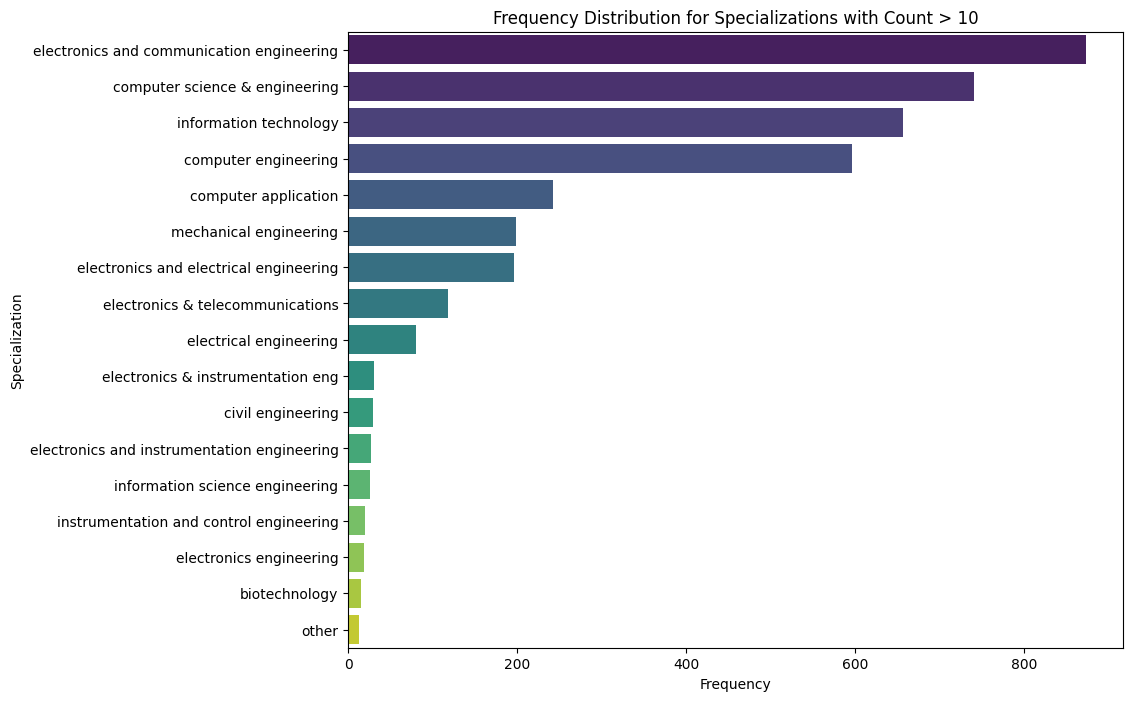

In [70]:
top_specializations = specialization_counts[specialization_counts > 10]

# Plot horizontal bar graph for filtered specializations
plt.figure(figsize=(10, 8))
sns.countplot(y='Specialization', data=df[df['Specialization'].isin(top_specializations.index)], order=top_specializations.index, palette='viridis')
plt.title("Frequency Distribution for Specializations with Count > 10")
plt.xlabel("Frequency")
plt.ylabel("Specialization")
plt.show()

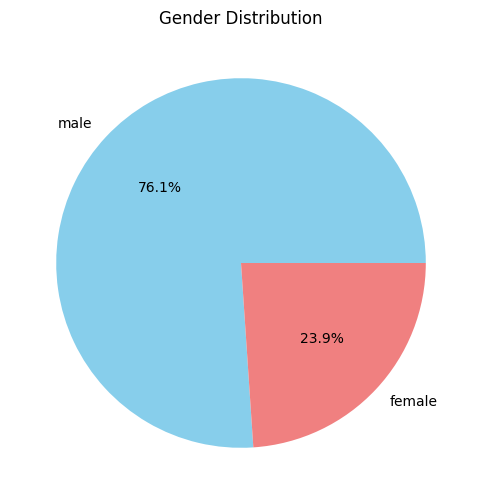

In [71]:
df['Gender'] = df['Gender'].replace({'m': 'male', 'f': 'female'})
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

<ipython-input-72-e919a95b9952>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Degree', palette='Set2', order=df['Degree'].value_counts().index)


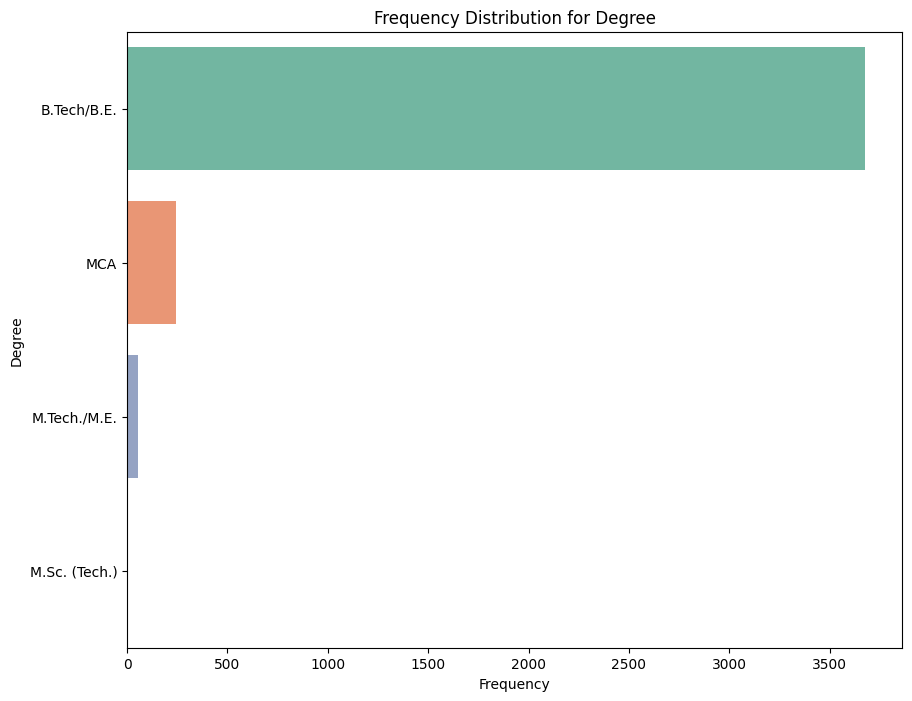

In [72]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='Degree', palette='Set2', order=df['Degree'].value_counts().index)
plt.title("Frequency Distribution for Degree")
plt.xlabel("Frequency")
plt.ylabel("Degree")
plt.show()

<ipython-input-73-19d1bc24b56b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='CollegeState', palette='Set3', order=df['CollegeState'].value_counts().index)


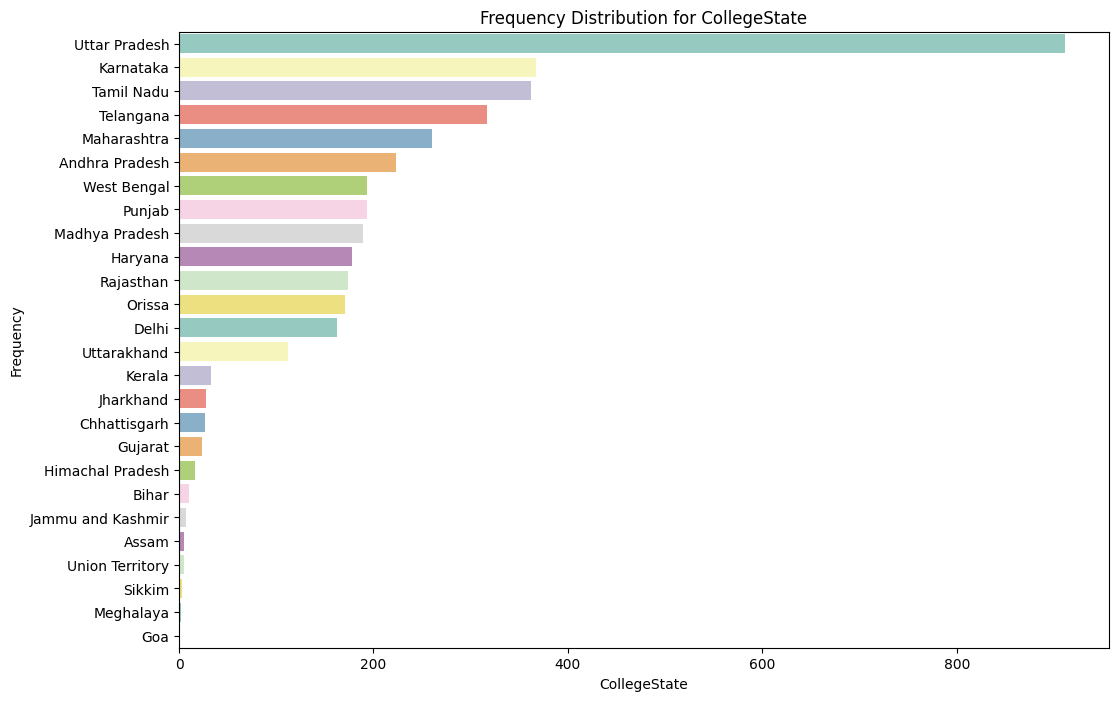

In [73]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='CollegeState', palette='Set3', order=df['CollegeState'].value_counts().index)
plt.title("Frequency Distribution for CollegeState")
plt.xlabel("CollegeState")
plt.ylabel("Frequency")
plt.show()

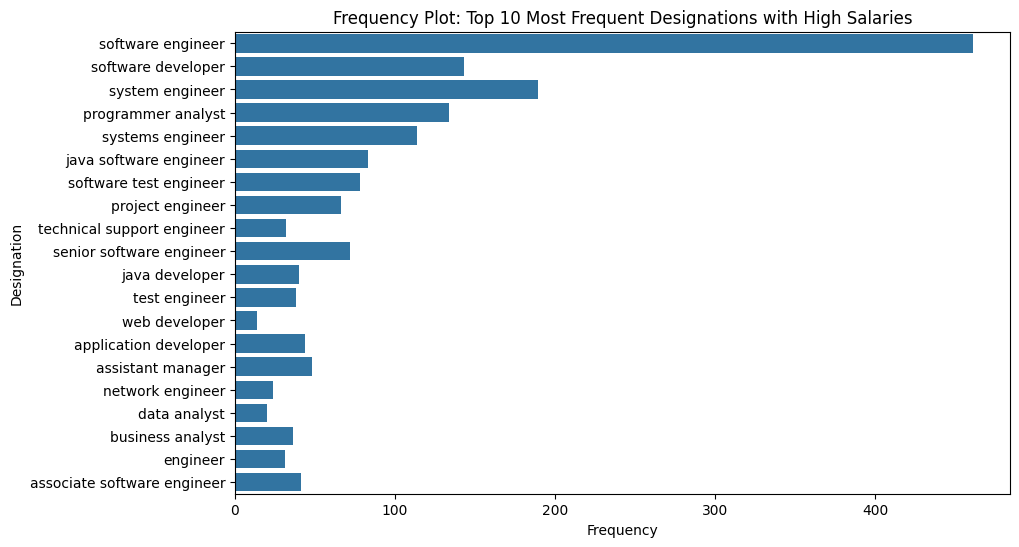

In [74]:
Designation_counts = df['Designation'].value_counts()

# Get the top 10 most frequent designations
top_20_designations = Designation_counts.head(20).index

# Filter the DataFrame for the top 10 most frequent designations with high salaries
df = df[(df['Designation'].isin(top_20_designations)) & (df['Salary'] > 2e5)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Designation', order=top_20_designations)
plt.title("Frequency Plot: Top 10 Most Frequent Designations with High Salaries")
plt.xlabel("Frequency")
plt.ylabel("Designation")
plt.show()



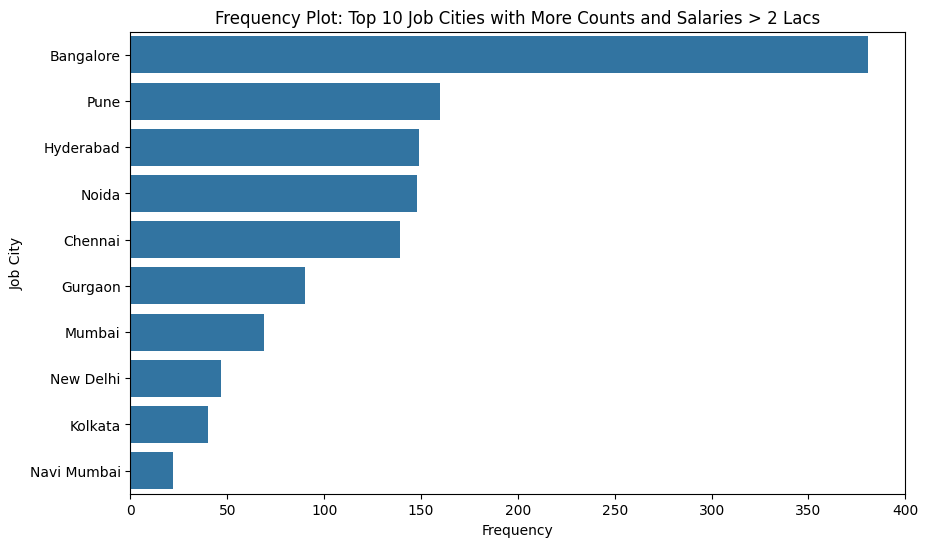

In [75]:
df = df[~df['JobCity'].str.contains(r'\d')]
job_cities_counts = df['JobCity'].value_counts()

# Get the top 10 most frequent designations
top_10_job_cities = job_cities_counts.head(10).index

# Filter the DataFrame for the top 10 most frequent designations with high salaries
df = df[(df['JobCity'].isin(top_10_job_cities)) & (df['Salary'] > 2e5)]

# Create a frequency plot for the top 10 job cities with more counts and salaries greater than 2 lacs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='JobCity', order=top_10_job_cities)
plt.title("Frequency Plot: Top 10 Job Cities with More Counts and Salaries > 2 Lacs")
plt.xlabel("Frequency")
plt.ylabel("Job City")
plt.show()

**Bivariate Analysis**

**Numerical vs Numerical**

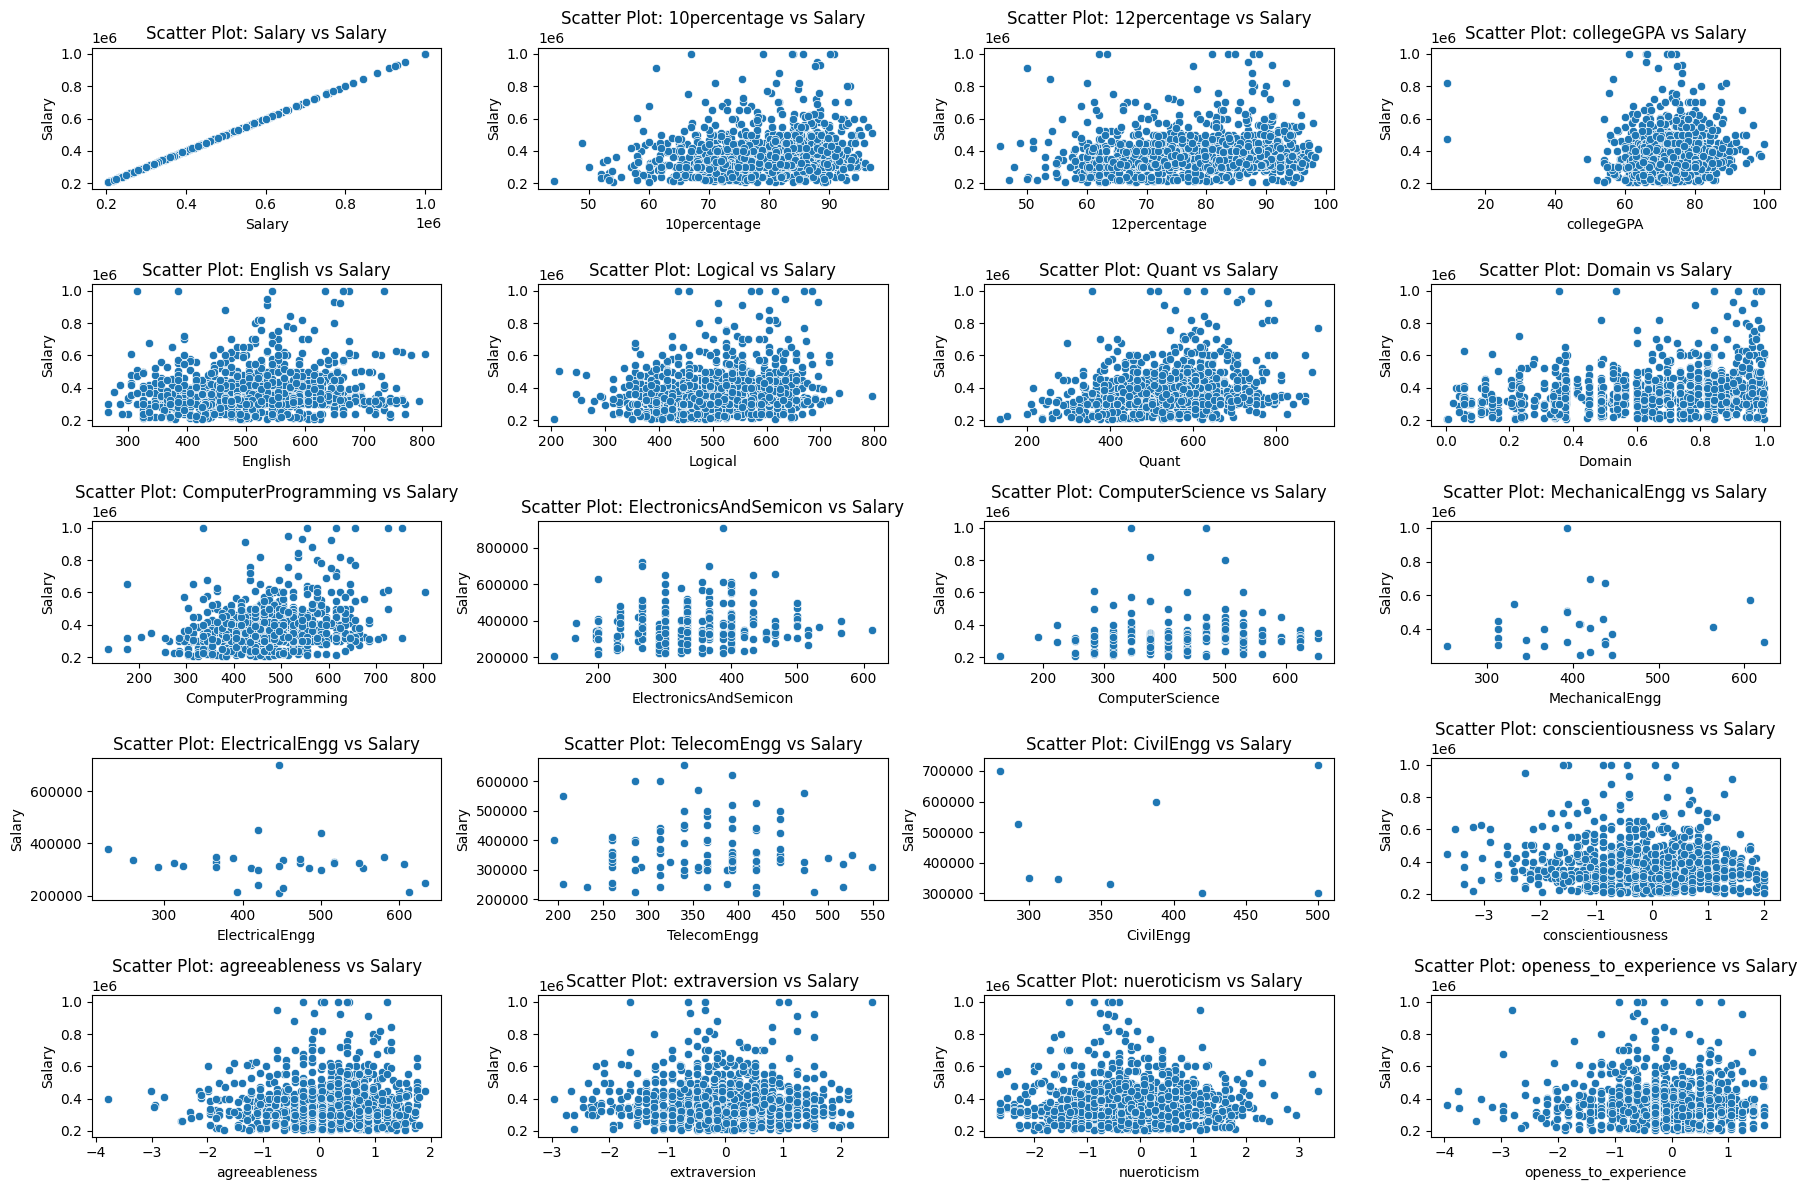

In [76]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(x=column, y='Salary', data=df)
    plt.title(f"Scatter Plot: {column} vs Salary")
    plt.xlabel(column)
    plt.ylabel("Salary")
    plt.tight_layout()

plt.show()

**Numerical vs Categorical**

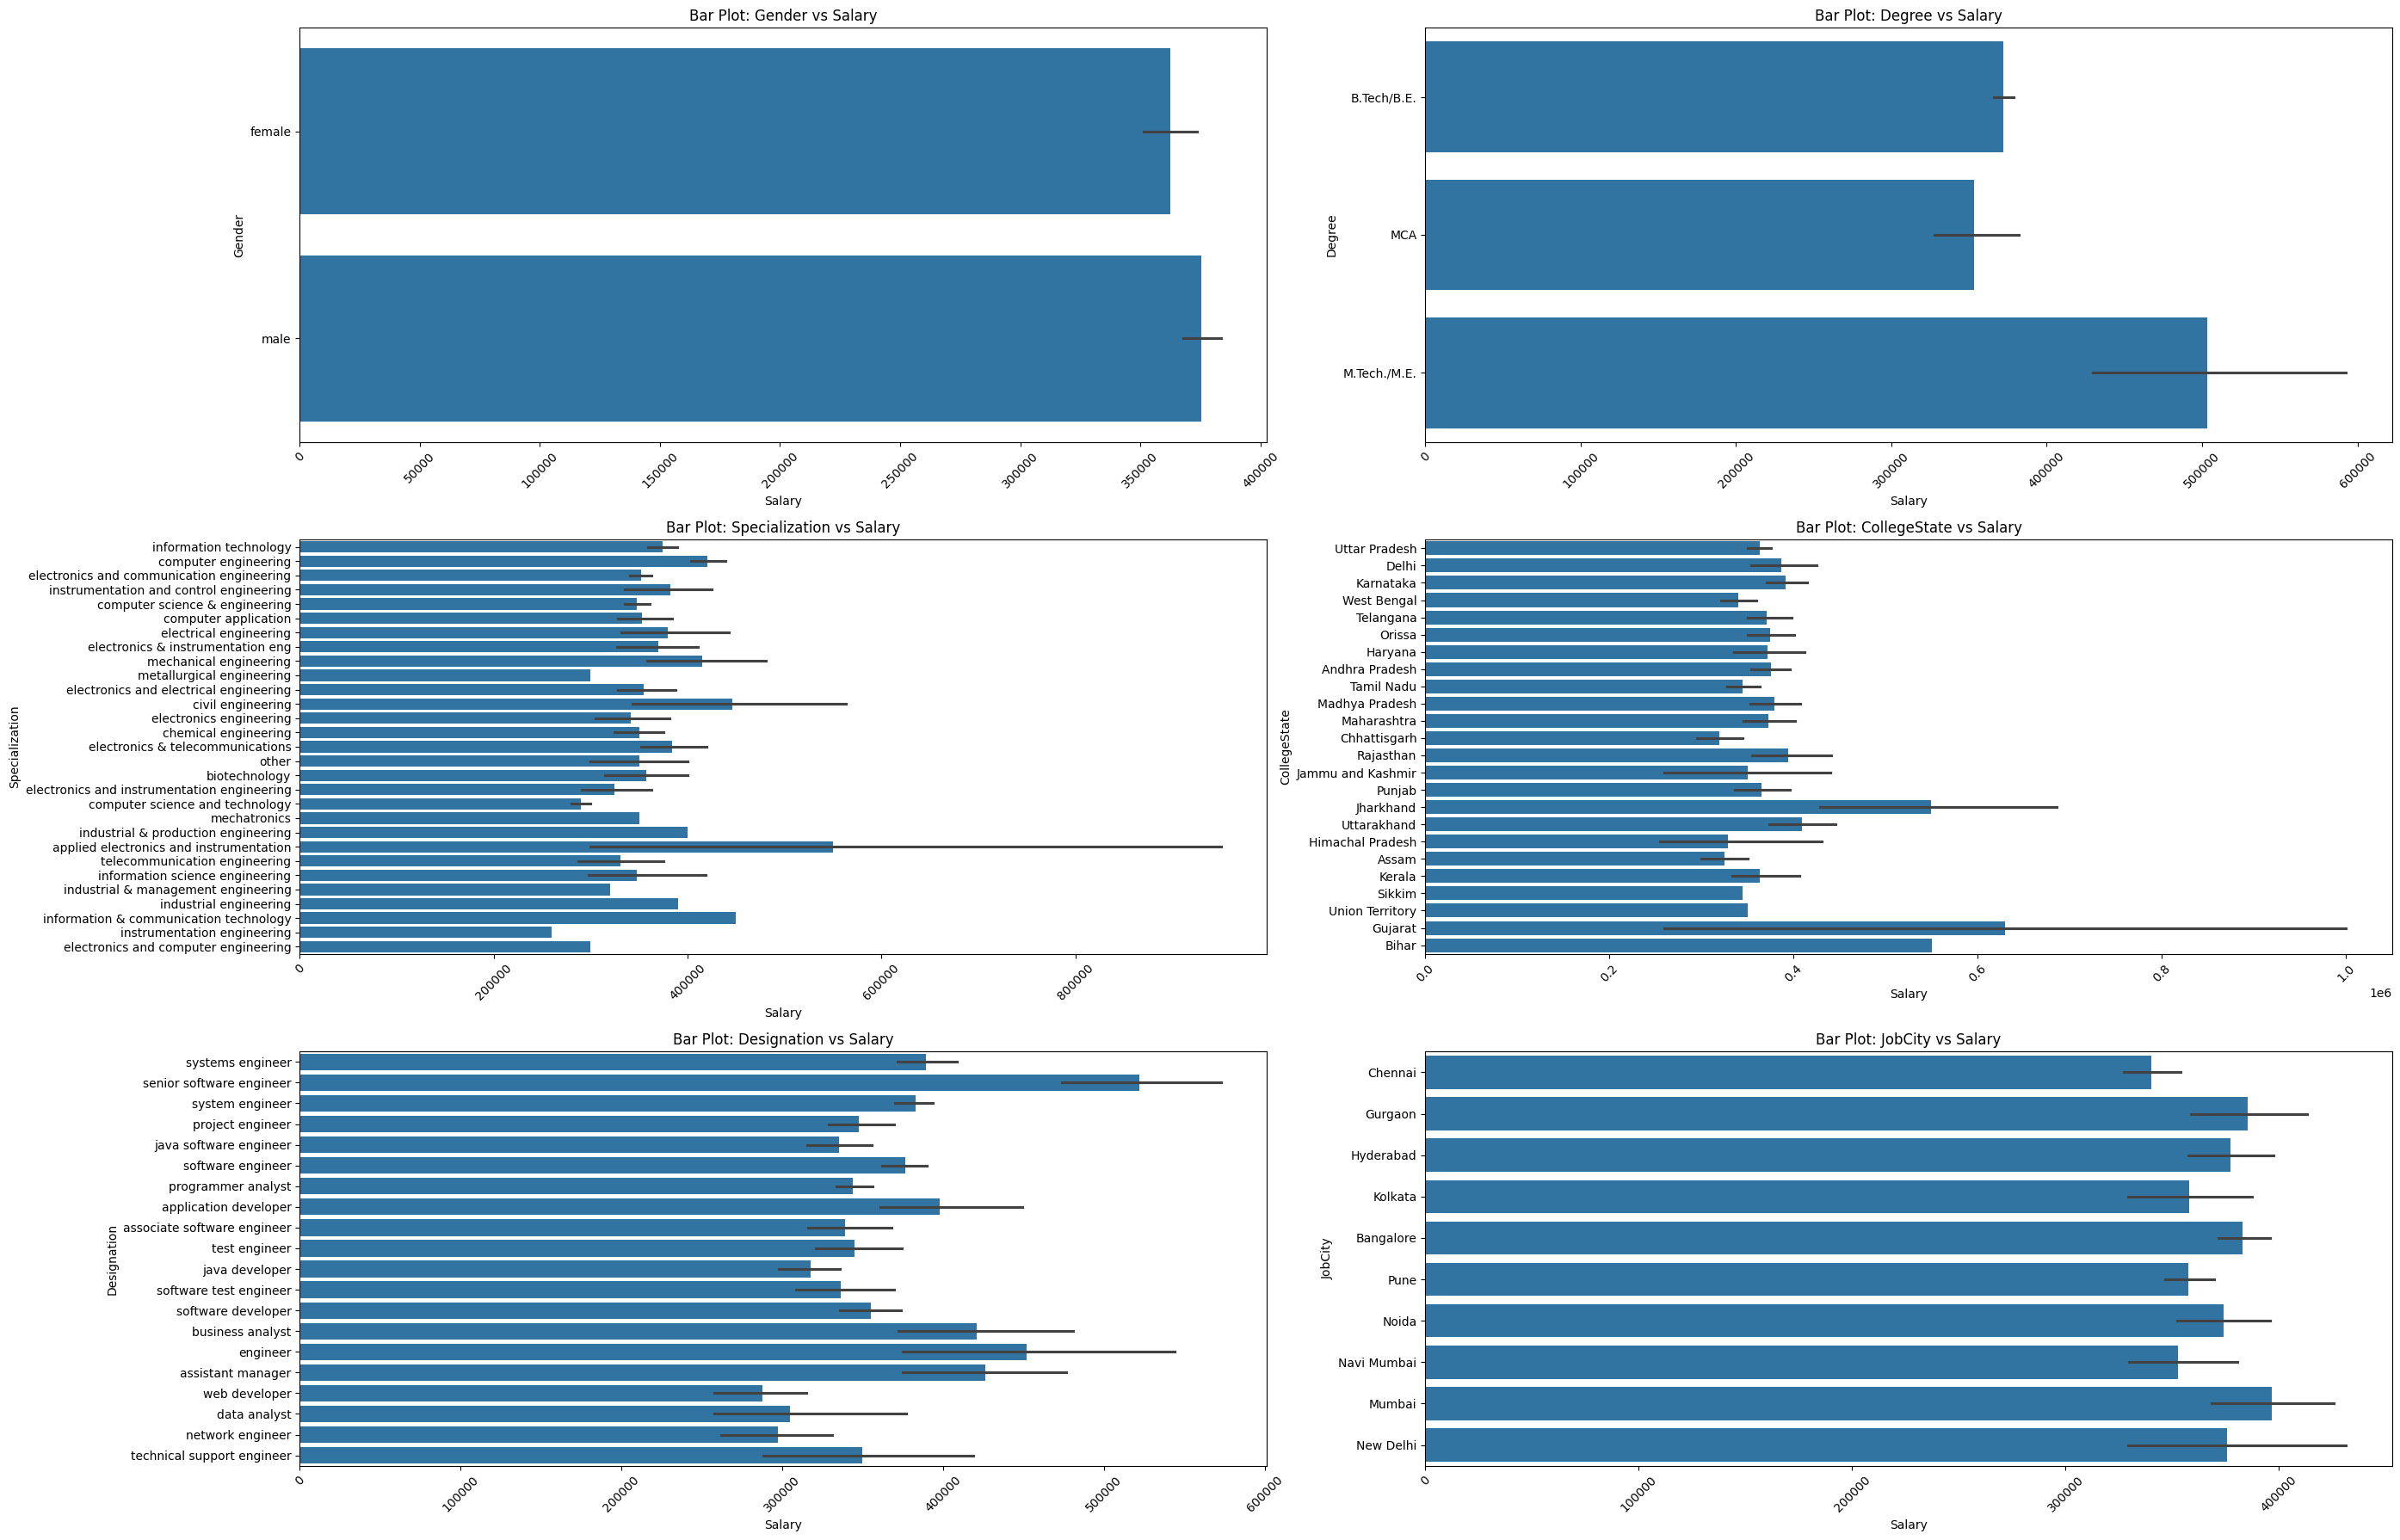

In [77]:
categorical_columns = ['Gender', 'Degree', 'Specialization', 'CollegeState', 'Designation', 'JobCity']
plt.figure(figsize=(28, 18))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Salary', y=column, data=df)
    plt.title(f"Bar Plot: {column} vs Salary")
    plt.xlabel("Salary")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

**Categorical Vs Categorical**

<Figure size 2000x2000 with 0 Axes>

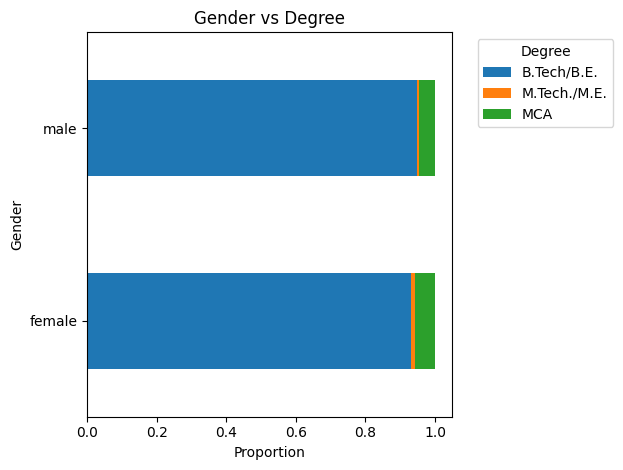

<Figure size 2000x2000 with 0 Axes>

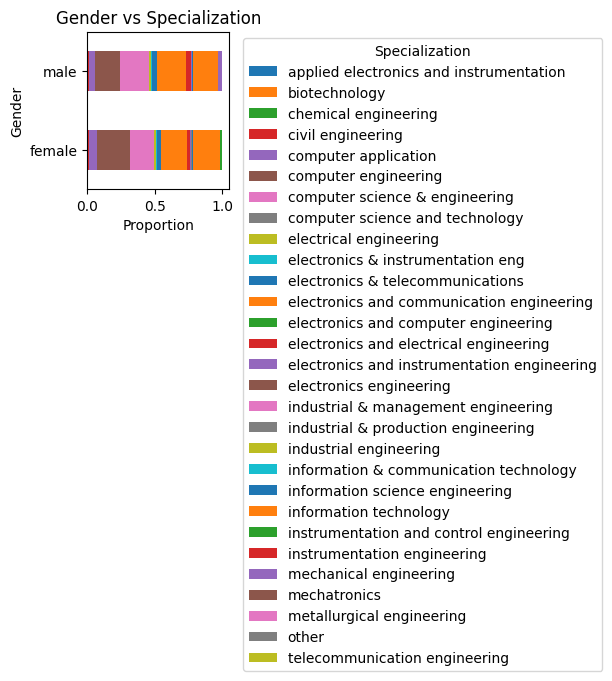

<Figure size 2000x2000 with 0 Axes>

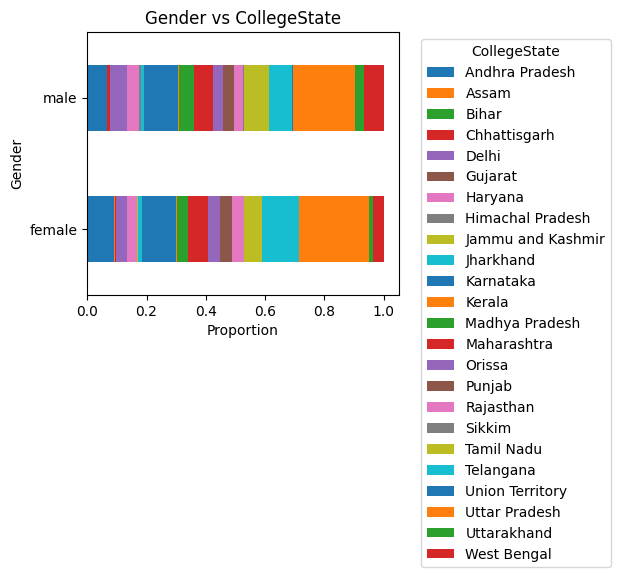

<Figure size 2000x2000 with 0 Axes>

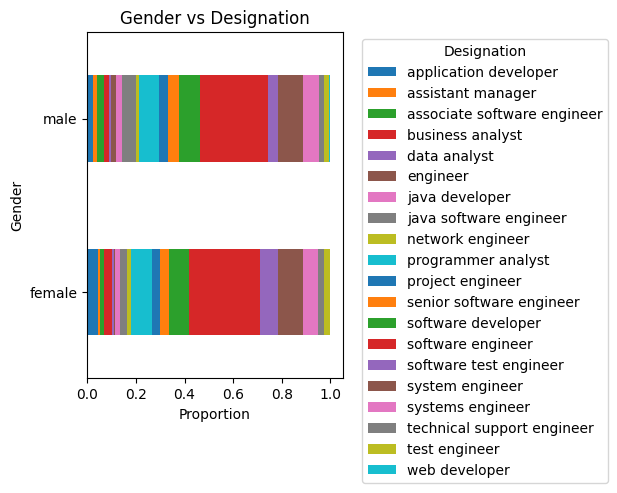

<Figure size 2000x2000 with 0 Axes>

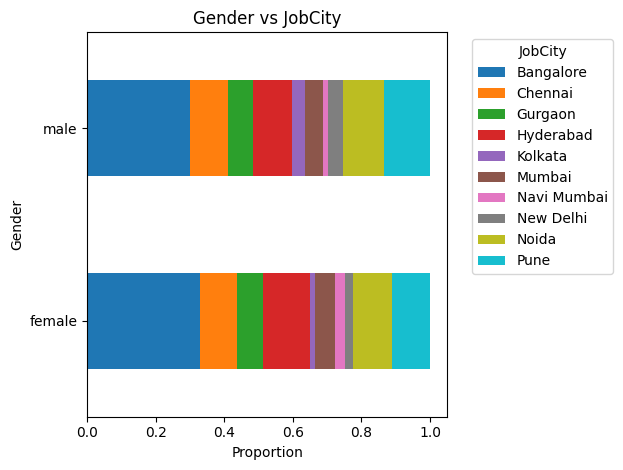

<Figure size 2000x2000 with 0 Axes>

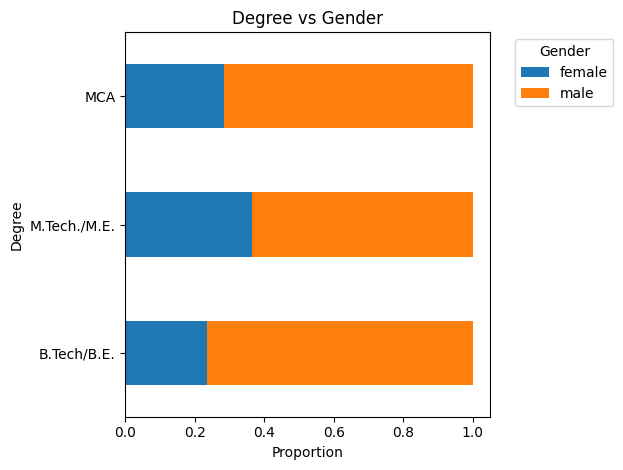

<Figure size 2000x2000 with 0 Axes>

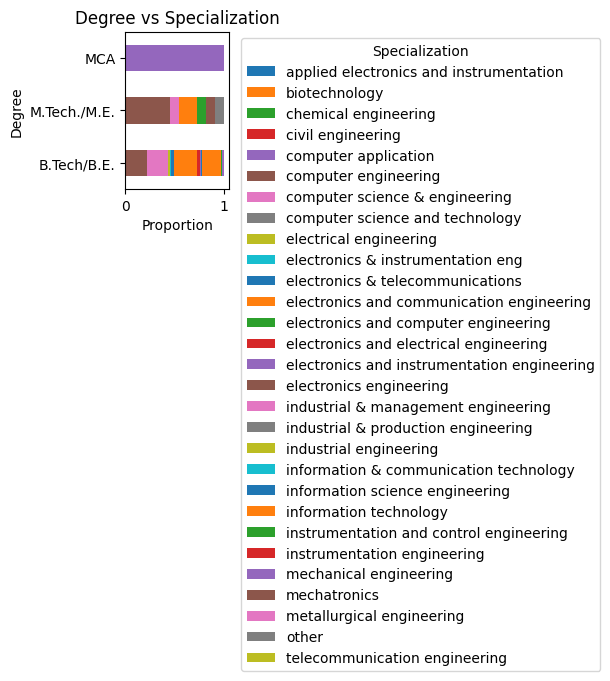

<Figure size 2000x2000 with 0 Axes>

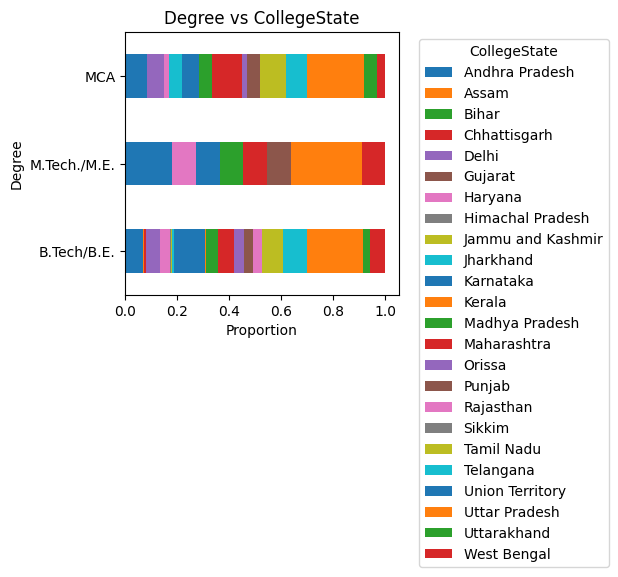

<Figure size 2000x2000 with 0 Axes>

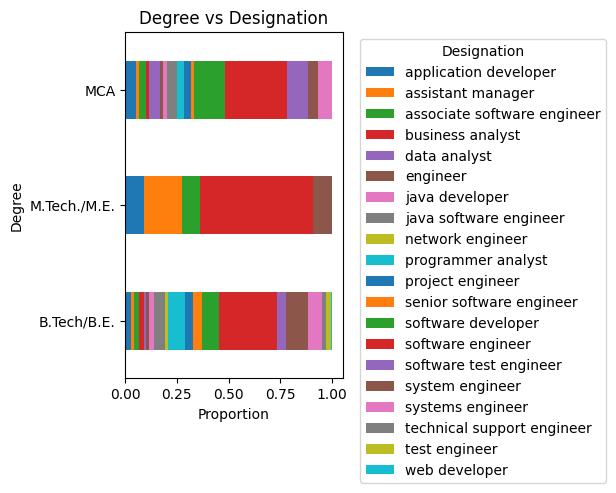

<Figure size 2000x2000 with 0 Axes>

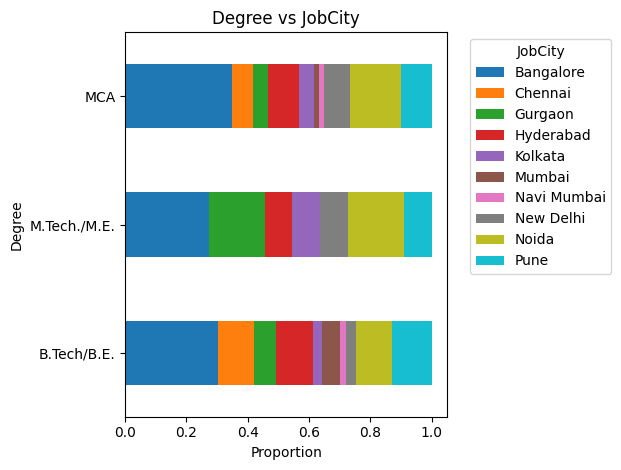

<Figure size 2000x2000 with 0 Axes>

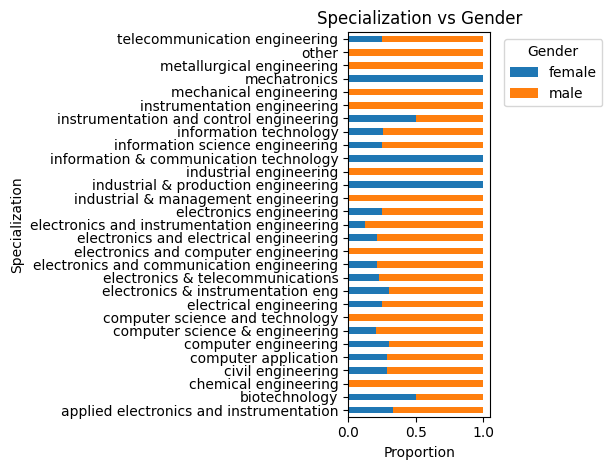

<Figure size 2000x2000 with 0 Axes>

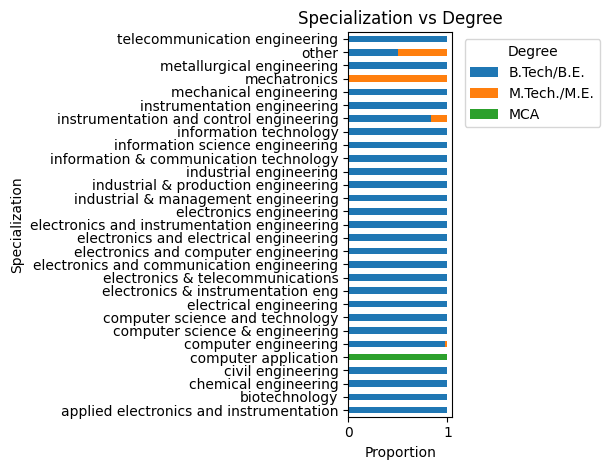

<Figure size 2000x2000 with 0 Axes>

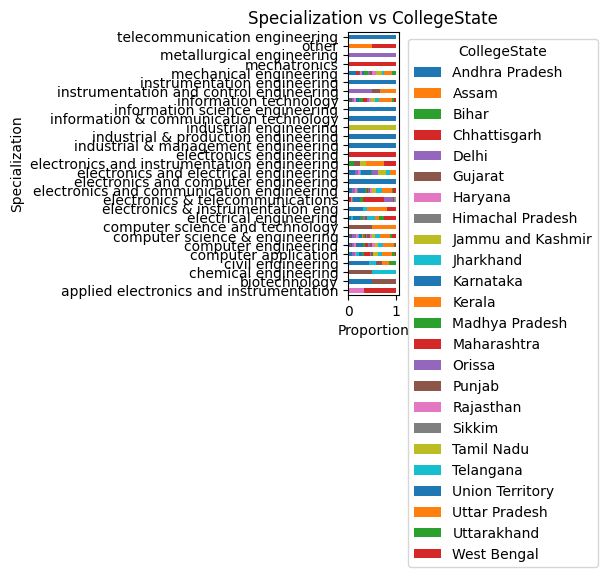

<ipython-input-78-f1b38db58eea>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2000x2000 with 0 Axes>

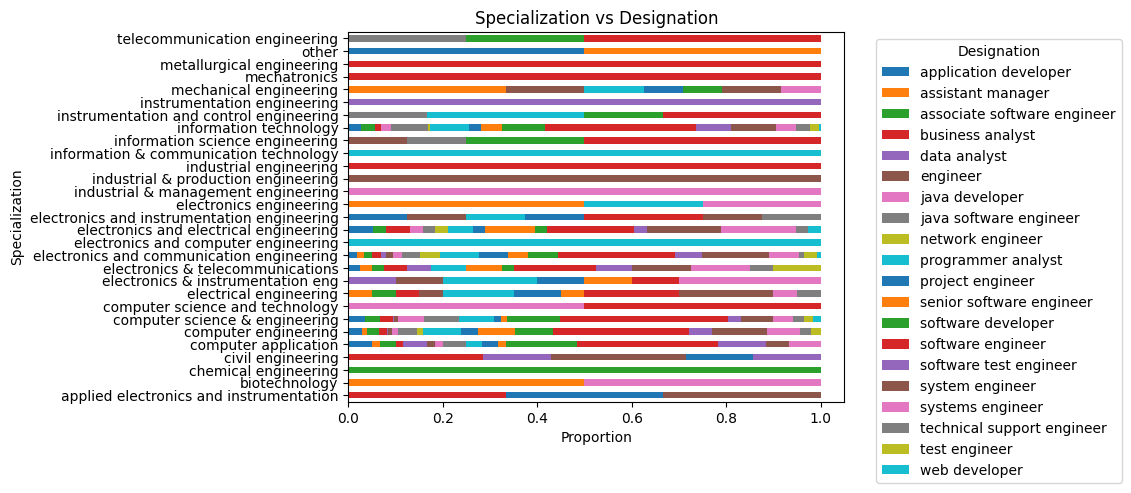

<Figure size 2000x2000 with 0 Axes>

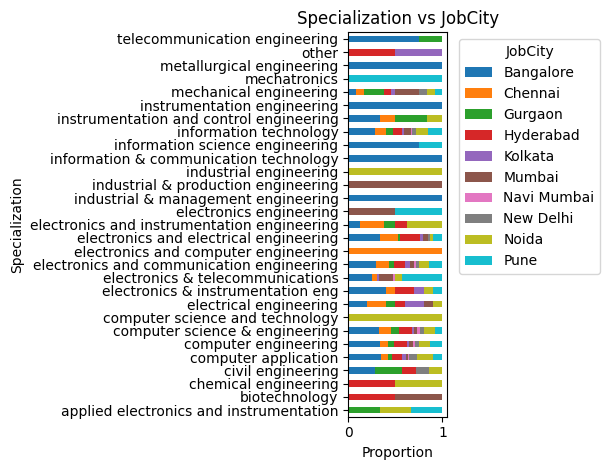

<Figure size 2000x2000 with 0 Axes>

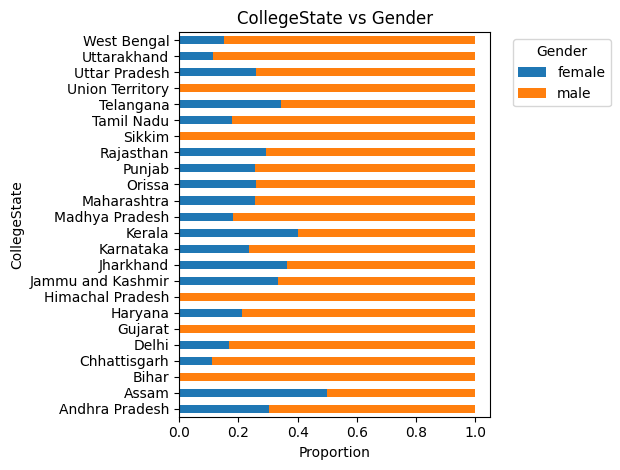

<Figure size 2000x2000 with 0 Axes>

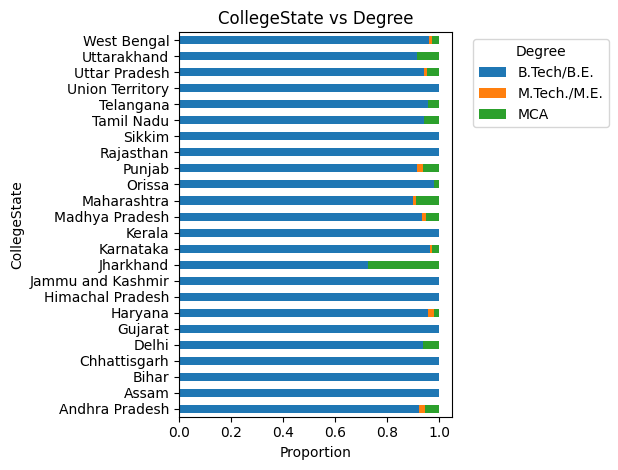

<Figure size 2000x2000 with 0 Axes>

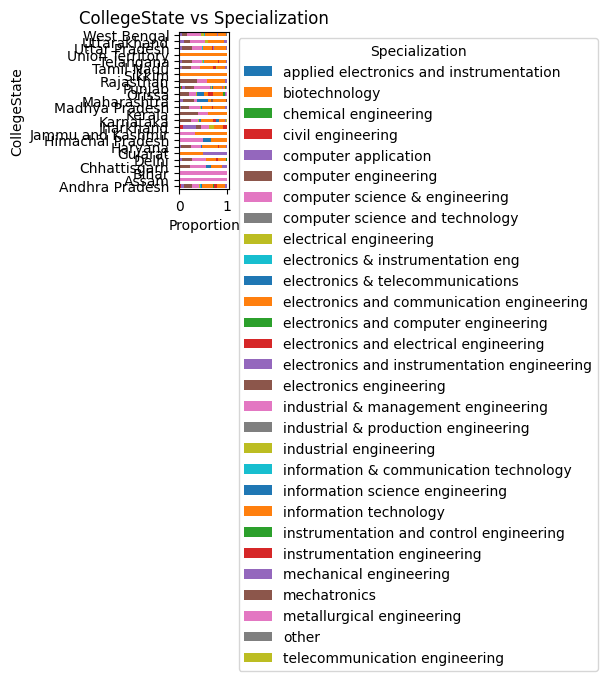

<Figure size 2000x2000 with 0 Axes>

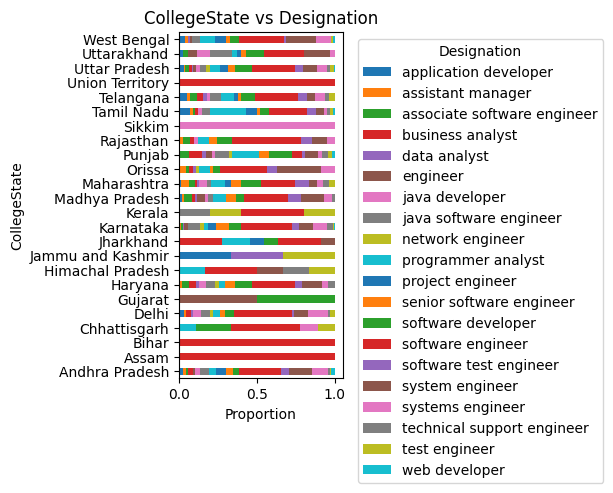

<Figure size 2000x2000 with 0 Axes>

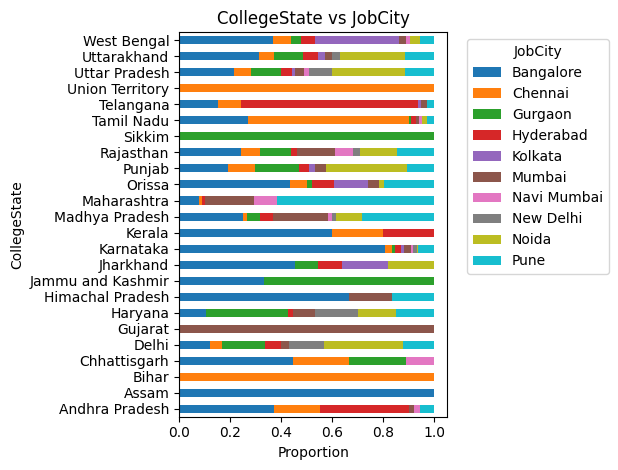

<Figure size 2000x2000 with 0 Axes>

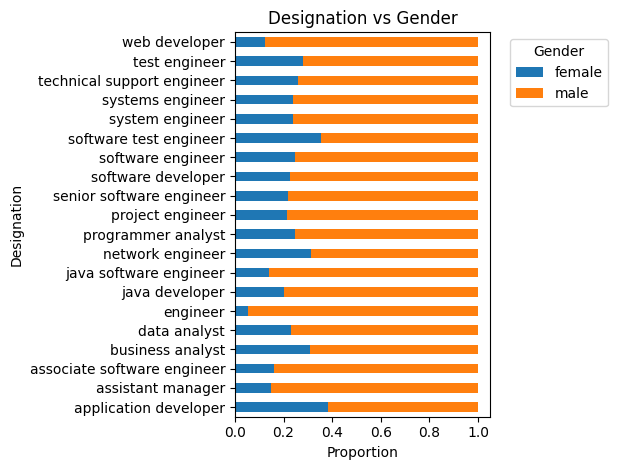

<Figure size 2000x2000 with 0 Axes>

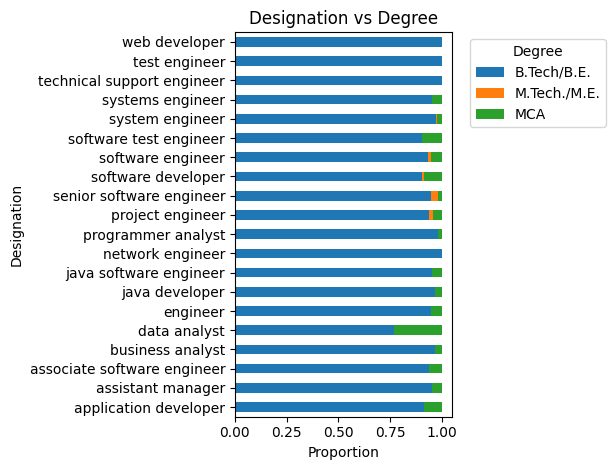

<ipython-input-78-f1b38db58eea>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 2000x2000 with 0 Axes>

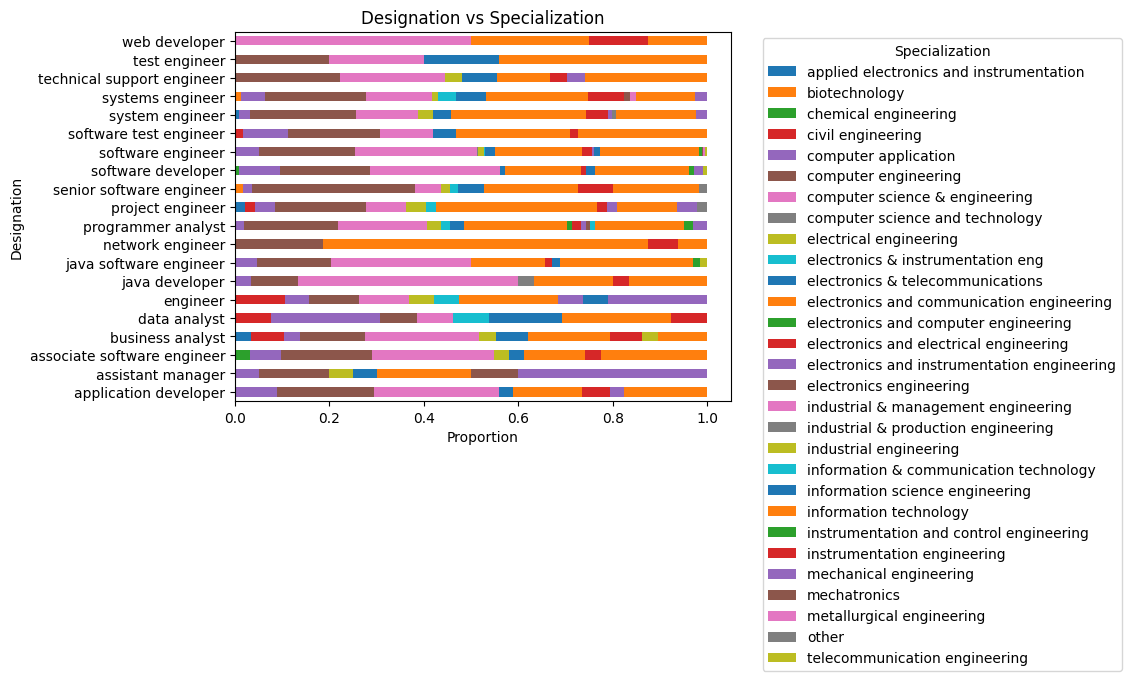

<Figure size 2000x2000 with 0 Axes>

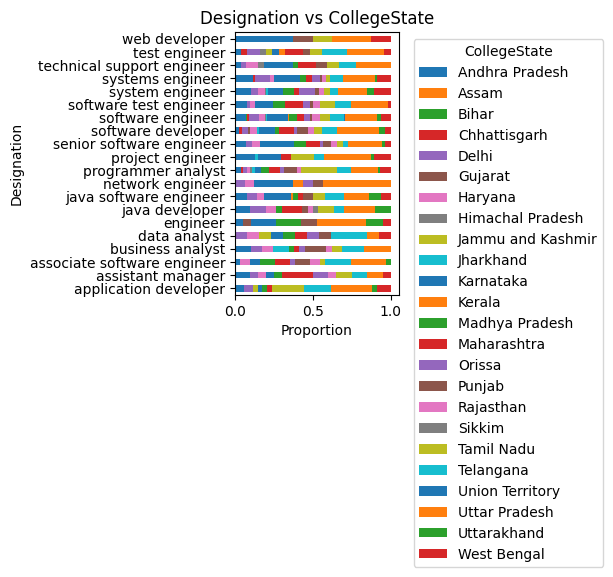

<Figure size 2000x2000 with 0 Axes>

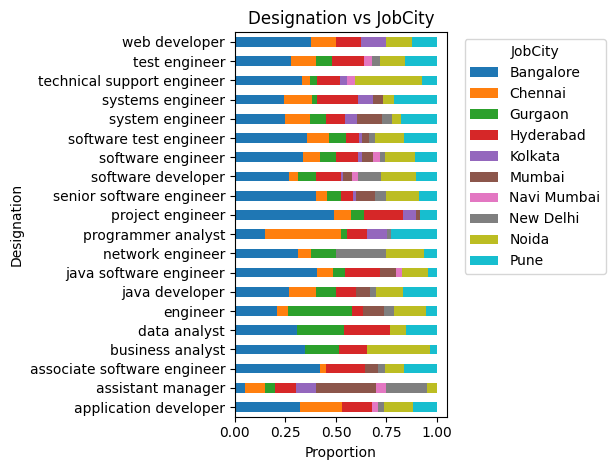

<Figure size 2000x2000 with 0 Axes>

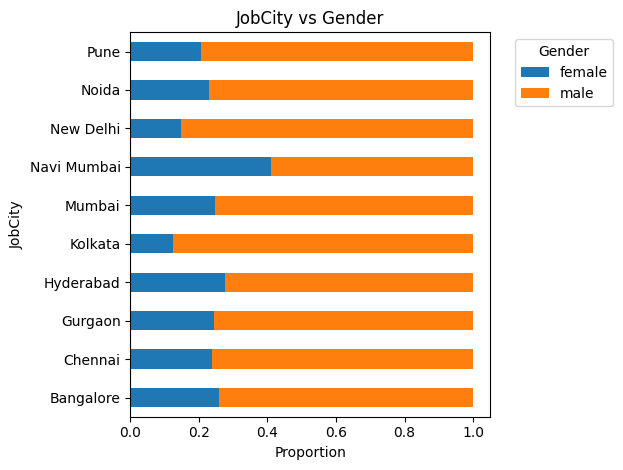

<Figure size 2000x2000 with 0 Axes>

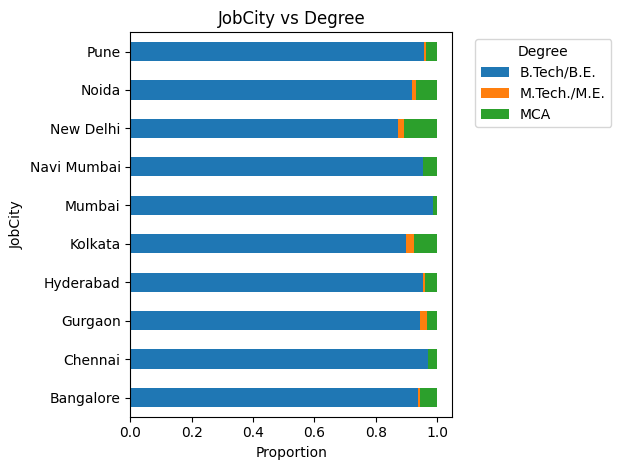

<Figure size 2000x2000 with 0 Axes>

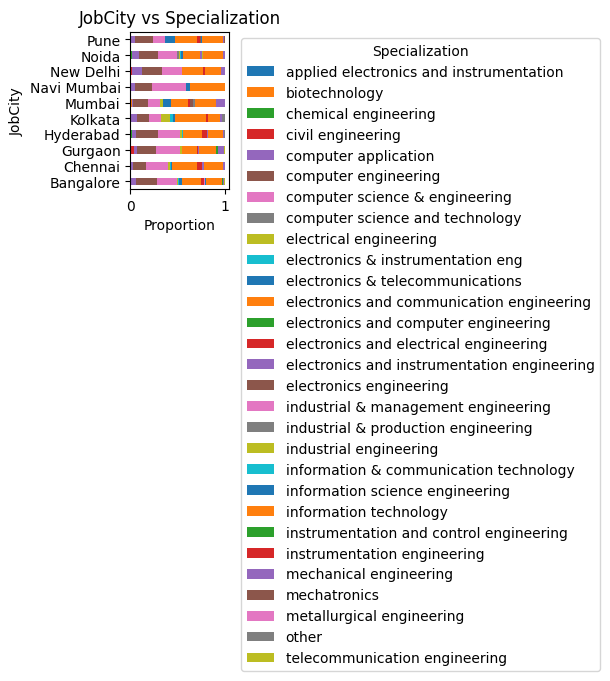

<Figure size 2000x2000 with 0 Axes>

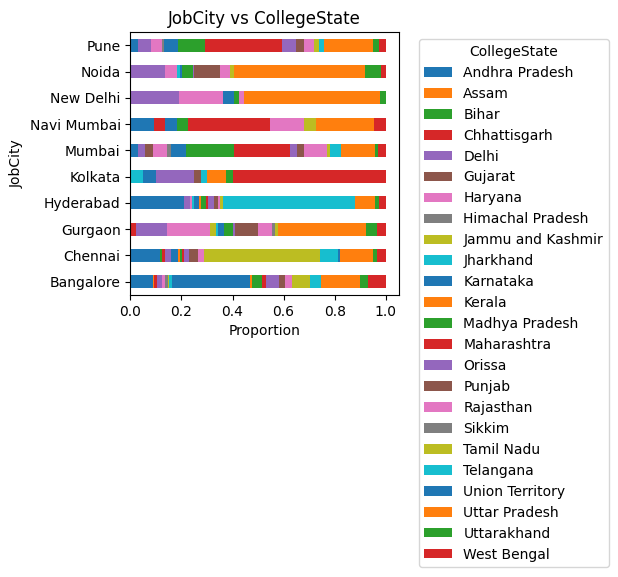

<Figure size 2000x2000 with 0 Axes>

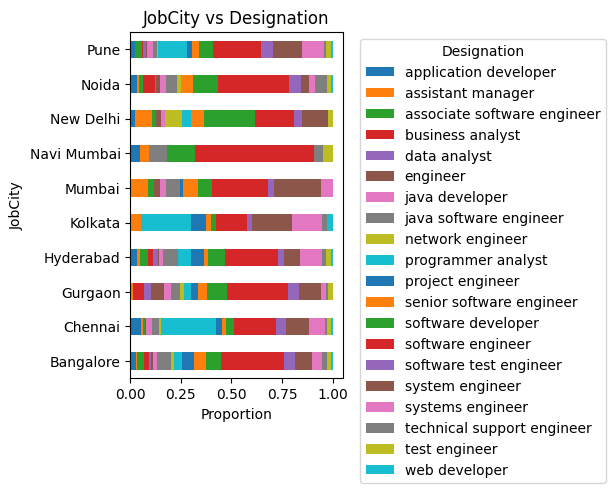

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical columns
categorical_columns = ['Gender', 'Degree', 'Specialization', 'CollegeState', 'Designation', 'JobCity']

# Create stacked bar plots for each combination of two categorical variables
for column1 in categorical_columns:
    for column2 in categorical_columns:
        if column1 != column2:
            # Calculate proportions
            crosstab = pd.crosstab(df[column1], df[column2], normalize='index')

            # Plot horizontal stacked bar plot
            plt.figure(figsize=(20, 20))
            ax = crosstab.plot(kind='barh', stacked=True)
            plt.title(f"{column1} vs {column2}")
            plt.xlabel("Proportion")
            plt.ylabel(column1)

            # Move legend outside the plot area
            plt.legend(title=column2, bbox_to_anchor=(1.05, 1), loc='upper left')

            plt.tight_layout()
            plt.show()
